# Business Understanding

## Describe the purpose of the data set you selected:

&emsp; This data is the collection of two datasets, one which is from a resort hotel and the other which is from a city hotel. The datasets have 40,060 observations and 79,330 obeservations respectively with both sharing 31 variables. The observations time range from July 1st 2015 until August 31st 2017. The data was orginally collected from "Hotel Booking Demand Datasets", written by Nuno Antonio, Ana Almeida, and Luis Nune for Data in Brief, Volume 22, February 2019. The data was consolidated from bookings, change logs, meal, transaction, and customer profiles.
<br>    
![title](dataset_origin_image.jpg)
<br>
   
&emsp; The primary purpose for the selection of this dataset is to research revenue management,such as the forecast of demand and prediction of problems such the likelihood of a hotel booking to be cancelled. Additionally this data could be used to generate models to see when is the ideal time to book a hotel room, or which days and for how long could you get the best rates. 

&emsp; After researching several key relationships among features, we will create machine learning models to predict the average daily rate("ADR", regression) and the probability of booking cancellations("is_canceled", classification). To effectively utilize our data and to improve the performance of our machine learning model, we will be then applying various dimensionality reduction techniques including logistic regression and Factor analysis of mixed data(FAMD), which will be discussed later in the report. 

&emsp; For the prediction metrics, we will be using k-fold cross validation as that will help our model have low bias and it is also beneficial to maximize the use of our dataset for both training and validation set. We will be using accuracy for the classification prediction on booking cancellations and Mean Squared Error for the regression prediction on the average daily rate(ADR). For both prediction metrics, we will be using 10 fold cross validation and a specific random state so we can get the consistent results throughout our modeling.
    

# Data Understanding

## Describe the meaning and type of data:
&emsp; The full description of the data can be found in https://www.sciencedirect.com/science/article/pii/S2352340918315191:


| Variable | Type | Description | Source/Engineering |
| --- | --- | --- | --- |
| ADR | Numeric | Average Daily Rate as defined by | BO, BL and TR / Calculated by dividing the sum of all lodging transactions by the total number of staying nights |
| Adults | Integer | Number of adults | BO and BL |
| Agent | Categorical | ID of the travel agency that made the bookinga | BO and BL |
| ArrivalDateDayOfMonth | Integer | Day of the month of the arrival date | BO and BL |
| ArrivalDateMonth | Categorical | Month of arrival date with 12 categories: “January” to “December”| BO and BL |
| ArrivalDateWeekNumber	| Integer | Week number of the arrival date | BO and BL |
| ArrivalDateYear | Integer | Year of arrival date | BO and BL |
| AssignedRoomType | Categorical | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | BO and BL |
| Babies | Integer | Number of babies | BO and BL |
| BookingChanges | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation | BO and BL/Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date, nights, reserved room type or meal |
| Children | Integer | Number of children | BO and BL/Sum of both payable and non-payable children |
| Company | Categorical | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons	BO and BL. |
| Country | Categorical | Country of origin. Categories are represented in the ISO 3155–3:2013 format [6] | BO, BL and NT |
| CustomerType | Categorical | Type of booking, assuming one of four categories: <br> Contract - when the booking has an allotment or other type of contract associated to it; <br> Group – when the booking is associated to a group; <br> Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; <br> Transient-party – when the booking is transient, but is associated to at least other transient booking <br> | BO and BL |
| DaysInWaitingList | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer | BO/Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS |
| DepositType | Categorical | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: <br> No Deposit – no deposit was made; <br> Non Refund – a deposit was made in the value of the total stay cost; <br> Refundable – a deposit was made with a value under the total cost of stay. | BO and TR/Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date. |
| DistributionChannel | Categorical | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and DC |
| IsCanceled | Categorical | Value indicating if the booking was canceled (1) or not (0) | BO |
| IsRepeatedGuest | Categorical | Value indicating if the booking name was from a repeated guest (1) or not (0) | BO, BL and C/ Variable created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the PMS database it was assumed the booking was from a repeated guest |
| LeadTime | Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date | BO and BL/ Subtraction of the entering date from the arrival date |
| MarketSegment | Categorical | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and MS |
| Meal | Categorical | Type of meal booked. | Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package; <br> BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) | BO, BL and ML |
| PreviousBookingsNotCanceled | Integer | Number of previous bookings not cancelled by the customer prior to the current booking | BO and BL / In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled. |
| PreviousCancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking | BO and BL/ In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled. |
| RequiredCardParkingSpaces | Integer | Number of car parking spaces required by the customer | BO and BL |
| ReservationStatus | Categorical | Reservation last status, assuming one of three categories: <br> Canceled – booking was canceled by the customer; <br> Check-Out – customer has checked in but already departed; <br> No-Show – customer did not check-in and did inform the hotel of the reason why | BO |
| ReservationStatusDate | Date | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel | BO |
| ReservedRoomType | Categorical | Code of room type reserved. Code is presented instead of designation for anonymity reasons | BO and BL |
| StaysInWeekendNights | Integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel | BO and BL/ Calculated by counting the number of weekend nights from the total number of nights |
| StaysInWeekNights | Integer | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel | BO and BL/Calculated by counting the number of week nights from the total number of nights |
| TotalOfSpecialRequests | Integer | Number of special requests made by the customer (e.g. twin bed or high floor) | BO and BL/Sum of all special requests |
<br>

In [140]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('~/Desktop/SMU/DS 7331 - Machine Learning 1/Lab 1/Data/hotel_bookings.csv') # read in the csv file

hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15


In [141]:
# Data info
hotel_bookings.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            


## Verify Data Quality

&emsp; Upon initial inspection of the 31 attributes 4 appear to have some missing data. However 3 additional attributes also appear to have missing data but instead of appearing as 'nan' they are labeled as 'Undefined'. Below is a list of all the attributes with missing values and the counts:

<ul>
<li>agent- 16340 </li>
<li>company- 112593</li>
<li>children- 4</li>
<li>country- 488</li>
<li>market_segment - 2</li> 
<li>meal - 1169</li>
<li>distribution_channel - 5 </li>
</ul>


&emsp; There's an association between the distribution channel type and the agent and company attributes. If the distribution channel is from a Traveling Agent or Tour Operator, then the agency company is supplied in the agent column. Similarly if the distribution channel is Corporate, then the company associated with the booking is populated under the company attribute. If the distribution is neither Corporate, TA or TO than both the agent and company attributes will be null. To simplify our data exploration we have decided to remove the agent and company attributes as they don't provide any additional information beyond what already is provided in the distribution channel. For the meal attribute during our data investigation we have found out that 'Undefined' and 'SC' are synonymous so we have decided to replace 'Undefined' with 'SC'. For the remainder they appear to have been ommitted accidentally and we have to decided to populate the missing values with the mode. 


Additionally, the following attributes were classified as objects, however they're categorical in nature so we have decided to encode each of these attributes with a corresponding number according to their alphabetical order:

<ul>
<li>hotel - ['City Hotel', 'Resort Hotel']</li>
<li>market_segment - ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
       'Offline TA/TO', 'Online TA']</li>
<li>meal - ['BB', 'FB', 'HB', 'SC']</li>
<li>reservation_status - ['Canceled', 'Check-Out', 'No-Show']</li>
<li>distribution_channel - ['Corporate', 'Direct', 'GDS', 'TA/TO']</li>
<li>reserved_room_type - ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P']</li>
<li>assigned_room_type - ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']</li>
<li>deposit_type - ['No Deposit', 'Non Refund', 'Refundable']</li>
<li>country - [['ABW','AGO','AIA','ALB','AND', 'ARE', 'ARG', 'ARM',
 'ASM', 'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA',
 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'COM', 'CPV',
 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO',
 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY',
 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL',
 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR',
 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX',
 'LVA', 'MAC', 'MAR', 'MCO' 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR',
 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC',
 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL',
 'PRI', 'PRT', 'PRY', 'PYF', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN',
 'SGP', 'SLE', 'SLV', 'SMR', 'SRB', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SYC',
 'SYR', 'TGO', 'THA', 'TJK', 'TMP', 'TUN', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR', 'UMI',
 'URY', 'USA', 'UZB', 'VEN', 'VGB', 'VNM', 'ZAF', 'ZMB', 'ZWE']]</li>
<li>customer_type - ['Contract', 'Group', 'Transient', 'Transient-Party']</li>
</ul>    


Lastly, for the arrival_date_month we decided to encode according to their correspoding month number in the gregorian calendar and construct two new columns that correspond to the generated timestamp from the concatenated arrival date and the reservation_status_date to help out with regression later on.





In [142]:
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [143]:
hotel_bookings.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [144]:
hotel_bookings.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [114]:
hotel_bookings.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [115]:
hotel_bookings.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [116]:
hotel_bookings.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [117]:
hotel_bookings.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [118]:
hotel_bookings.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [119]:
hotel_bookings.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [120]:
hotel_bookings.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [139]:
hotel_bookings.customer_type.unique()

array([2, 0, 3, 1], dtype=int8)

In [122]:
hotel_bookings.loc[hotel_bookings['market_segment'] == 'Undefined']['market_segment'].count()

2

In [123]:
hotel_bookings.loc[hotel_bookings['meal'] == 'Undefined']['meal'].count()

1169

In [124]:
hotel_bookings.loc[hotel_bookings['distribution_channel'] == 'Undefined']['distribution_channel'].count()


5

In [125]:
hotel_bookings[['children','country','market_segment','meal','distribution_channel']].mode() 

,children,country,market_segment,meal,distribution_channel
0,0.0,PRT,Online TA,BB,TA/TO


In [126]:
import math
import numpy as np
hotel_bookings_transform = hotel_bookings
hotel_bookings_transform['children']= hotel_bookings_transform['children'].apply(lambda x: 0 if  math.isnan(x)  else x)
hotel_bookings_transform['country']= hotel_bookings_transform['country'].apply(lambda x: 'PRT' if  pd.isna(x)  else x)
hotel_bookings_transform['market_segment']= hotel_bookings_transform['market_segment'].apply(lambda x: 'Online TA' if  x == 'Undefined'  else x)
hotel_bookings_transform['meal']= hotel_bookings_transform['meal'].apply(lambda x: 'SC' if  x == 'Undefined'  else x)
hotel_bookings_transform['distribution_channel']= hotel_bookings_transform['distribution_channel'].apply(lambda x: 'TA/TO' if  x == 'Undefined'  else x)





In [127]:
hotel_bookings['country'].astype('category').cat.categories

Index(['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA',
       ...
       'UMI', 'URY', 'USA', 'UZB', 'VEN', 'VGB', 'VNM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', length=177)

In [128]:
hotel_bookings['hotel'].astype('category').cat.categories

Index(['City Hotel', 'Resort Hotel'], dtype='object')

In [129]:
hotel_bookings['market_segment'].astype('category').cat.categories

Index(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
       'Offline TA/TO', 'Online TA'],
      dtype='object')

In [130]:
hotel_bookings['meal'].astype('category').cat.categories

Index(['BB', 'FB', 'HB', 'SC'], dtype='object')

In [131]:
hotel_bookings['reservation_status'].astype('category').cat.categories

Index(['Canceled', 'Check-Out', 'No-Show'], dtype='object')

In [132]:
hotel_bookings['distribution_channel'].astype('category').cat.categories

Index(['Corporate', 'Direct', 'GDS', 'TA/TO'], dtype='object')

In [133]:
hotel_bookings['reserved_room_type'].astype('category').cat.categories

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'], dtype='object')

In [134]:
hotel_bookings['assigned_room_type'].astype('category').cat.categories

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'], dtype='object')

In [135]:
hotel_bookings['deposit_type'].astype('category').cat.categories

Index(['No Deposit', 'Non Refund', 'Refundable'], dtype='object')

In [136]:
hotel_bookings['customer_type'].astype('category').cat.categories

Index(['Contract', 'Group', 'Transient', 'Transient-Party'], dtype='object')

In [137]:
hotel_bookings_transform['hotel']=hotel_bookings_transform['hotel'].astype('category').cat.codes
hotel_bookings_transform['market_segment']=hotel_bookings_transform['market_segment'].astype('category').cat.codes
hotel_bookings_transform['meal']=hotel_bookings_transform['meal'].astype('category').cat.codes
hotel_bookings_transform['reservation_status']=hotel_bookings_transform['reservation_status'].astype('category').cat.codes
hotel_bookings_transform['distribution_channel']=hotel_bookings_transform['distribution_channel'].astype('category').cat.codes
hotel_bookings_transform['reserved_room_type']=hotel_bookings_transform['reserved_room_type'].astype('category').cat.codes
hotel_bookings_transform['assigned_room_type']=hotel_bookings_transform['assigned_room_type'].astype('category').cat.codes
hotel_bookings_transform['deposit_type']=hotel_bookings_transform['deposit_type'].astype('category').cat.codes
hotel_bookings_transform['customer_type']=hotel_bookings_transform['customer_type'].astype('category').cat.codes

In [138]:
hotel_bookings_transform= hotel_bookings_transform.drop(columns=['agent','company'])

In [78]:
hotel_bookings_transform

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,...,2,3,0,0,2,0.00,0,0,1,7/1/15
1,1,0,737,2015,July,27,1,0,0,2,...,2,4,0,0,2,0.00,0,0,1,7/1/15
2,1,0,7,2015,July,27,1,0,1,1,...,2,0,0,0,2,75.00,0,0,1,7/2/15
3,1,0,13,2015,July,27,1,0,1,1,...,0,0,0,0,2,75.00,0,0,1,7/2/15
4,1,0,14,2015,July,27,1,0,2,2,...,0,0,0,0,2,98.00,0,1,1,7/3/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,August,35,30,2,5,2,...,0,0,0,0,2,96.14,0,0,1,9/6/17
119386,0,0,102,2017,August,35,31,2,5,3,...,4,0,0,0,2,225.43,0,2,1,9/7/17
119387,0,0,34,2017,August,35,31,2,5,2,...,3,0,0,0,2,157.71,0,4,1,9/7/17
119388,0,0,109,2017,August,35,31,2,5,2,...,0,0,0,0,2,104.40,0,0,1,9/7/17


In [79]:
assign_month = {"arrival_date_month": {"January": 1, "February": 2, "March": 3, "April": 4,"May": 5,"June": 6,"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}}
hotel_bookings_transform = hotel_bookings_transform.replace(assign_month)
hotel_bookings_transform.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,7,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,7/1/15
1,1,0,737,2015,7,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,7/1/15
2,1,0,7,2015,7,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,7/2/15
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,7/2/15
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,7/3/15


In [80]:
#TODO: modify this code with hotel_bookings
hotel_bookings_transform=hotel_bookings_transform.assign(booking_date = hotel_bookings_transform["arrival_date_year"].astype(str) + '-' + 
hotel_bookings_transform["arrival_date_month"].astype(str) + '-' +hotel_bookings_transform["arrival_date_day_of_month"].astype(str))
hotel_bookings_transform['booking_date']=pd.to_datetime(hotel_bookings_transform.booking_date)
hotel_bookings_transform['booking_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: booking_date, Length: 119390, dtype: datetime64[ns]

In [81]:
hotel_bookings_transform.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [82]:
hotel_bookings.mode()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,0,2016,August,33,17,0,2,2,...,0,9.0,40.0,0,2,62.0,0,0,1,10/21/15


In [83]:
hotel_bookings.loc[:,"agent"].mode()

0    9.0
dtype: float64

In [84]:
hotel_bookings.loc[:,"company"].mode()

0    40.0
dtype: float64

## Simple Statistics

&emsp; To evaluate the simple statistics we split the categorical and non categorical data. For the categorical data we explored the overall number of observations per category to find out the distribution. For the non-categorical data we explored the simple (Mean, STD, Min, Max, Percentile) by a simple describe. We used the result of this data in future visualizations. Lastly we wanted to see the total number of outliers for each of the non-categorical attributes, we decided to classify anything that was more than 3 standard deviations as an outlier below you'll see the result.

- Categorical Values:
    - hotel
    - market_segment
    - meal
    - reservation_status
    - distribution_channel
    - reserved_room_type
    - assigned_room_type
    - deposit_type
    - country 
    - customer_type

- Non-categorical:
    - lead_time                       
    - arrival_date_year               
    - arrival_date_month              
    - arrival_date_week_number        
    - stays_in_weekend_nights         
    - stays_in_week_nights            
    - adults                          
    - children                        
    - babies                          
    - previous_cancellations          
    - previous_bookings_not_canceled  
    - booking_changes                 
    - days_in_waiting_list            
    - adr                             
    - required_car_parking_spaces     
    - total_of_special_requests       
    - reservation_status_date         
    - booking_date   

In [85]:
hotel_bookings_transform_non_categorical = hotel_bookings_transform.drop(columns=['hotel','market_segment','meal','reservation_status','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','country','customer_type','is_canceled','is_repeated_guest','arrival_date_day_of_month'])
hotel_bookings_transform_non_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   lead_time                       119390 non-null  int64         
 1   arrival_date_year               119390 non-null  int64         
 2   arrival_date_month              119390 non-null  int64         
 3   arrival_date_week_number        119390 non-null  int64         
 4   stays_in_weekend_nights         119390 non-null  int64         
 5   stays_in_week_nights            119390 non-null  int64         
 6   adults                          119390 non-null  int64         
 7   children                        119390 non-null  float64       
 8   babies                          119390 non-null  int64         
 9   previous_cancellations          119390 non-null  int64         
 10  previous_bookings_not_canceled  119390 non-null  int64  

In [86]:
hotel_bookings_transform_categorical = hotel_bookings_transform[['hotel','market_segment','meal','reservation_status','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','country','customer_type','is_canceled','is_repeated_guest']]
hotel_bookings_transform_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   hotel                 119390 non-null  int8  
 1   market_segment        119390 non-null  int8  
 2   meal                  119390 non-null  int8  
 3   reservation_status    119390 non-null  int8  
 4   distribution_channel  119390 non-null  int8  
 5   reserved_room_type    119390 non-null  int8  
 6   assigned_room_type    119390 non-null  int8  
 7   deposit_type          119390 non-null  int8  
 8   country               119390 non-null  object
 9   customer_type         119390 non-null  int8  
 10  is_canceled           119390 non-null  int64 
 11  is_repeated_guest     119390 non-null  int64 
dtypes: int64(2), int8(9), object(1)
memory usage: 3.8+ MB


In [87]:
hotel_bookings_transform_non_categorical.describe()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,6.552483,27.165173,0.927599,2.500302,1.856403,0.103886,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,3.090619,13.605138,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,4.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,7.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,9.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,12.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [88]:
#Percentage by hotel
hotel_bookings_transform_categorical['hotel'].value_counts()/hotel_bookings_transform_categorical['hotel'].count()

0    0.664461
1    0.335539
Name: hotel, dtype: float64

In [89]:
#Percentage by hotel
hotel_bookings_transform_categorical['market_segment'].value_counts()/hotel_bookings_transform_categorical['market_segment'].count()

6    0.473063
5    0.202856
4    0.165935
3    0.105587
2    0.044350
1    0.006223
0    0.001985
Name: market_segment, dtype: float64

In [90]:
#Percentage by meal
hotel_bookings_transform_categorical['meal'].value_counts()/hotel_bookings_transform_categorical['meal'].count()

0    0.773180
2    0.121141
3    0.098995
1    0.006684
Name: meal, dtype: float64

In [91]:
#Percentage by reservation status
hotel_bookings_transform_categorical['reservation_status'].value_counts()/hotel_bookings_transform_categorical['reservation_status'].count()

1    0.629584
0    0.360307
2    0.010110
Name: reservation_status, dtype: float64

In [92]:
#Percentage by reservation status
hotel_bookings_transform_categorical['distribution_channel'].value_counts()/hotel_bookings_transform_categorical['distribution_channel'].count()

3    0.819792
1    0.122665
0    0.055926
2    0.001617
Name: distribution_channel, dtype: float64

In [93]:
#Percentage by reservation roomtype
hotel_bookings_transform_categorical['reserved_room_type'].value_counts()/hotel_bookings_transform_categorical['reserved_room_type'].count()

0    0.720278
3    0.160826
4    0.054737
5    0.024265
6    0.017539
1    0.009364
2    0.007806
7    0.005034
9    0.000101
8    0.000050
Name: reserved_room_type, dtype: float64

In [94]:
#Percentage by assigned_room_type
hotel_bookings_transform_categorical['assigned_room_type'].value_counts()/hotel_bookings_transform_categorical['assigned_room_type'].count()

0     0.620261
3     0.212095
4     0.065382
5     0.031418
6     0.021384
2     0.019893
1     0.018117
7     0.005964
8     0.003040
9     0.002337
11    0.000101
10    0.000008
Name: assigned_room_type, dtype: float64

In [95]:
#Percentage by deposit_type
hotel_bookings_transform_categorical['deposit_type'].value_counts()/hotel_bookings_transform_categorical['deposit_type'].count()

0    0.876464
1    0.122179
2    0.001357
Name: deposit_type, dtype: float64

In [96]:
#Percentange by country
hotel_bookings_transform_categorical['country'].value_counts()/hotel_bookings_transform_categorical['country'].count()

PRT    0.411073
GBR    0.101591
FRA    0.087235
ESP    0.071765
DEU    0.061035
         ...   
SDN    0.000008
MRT    0.000008
MDG    0.000008
DMA    0.000008
SMR    0.000008
Name: country, Length: 177, dtype: float64

In [97]:
#Percentage by customer_type
hotel_bookings_transform_categorical['customer_type'].value_counts()/hotel_bookings_transform_categorical['customer_type'].count()

2    0.750591
3    0.210436
0    0.034140
1    0.004833
Name: customer_type, dtype: float64

In [98]:
from scipy import stats
#outlier adr
adr = hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['adr']])) > 3).all(axis=1)]['adr']
adr.describe()

count    1138.000000
mean      290.785571
std       154.793763
min       253.490000
25%       263.000000
50%       276.600000
75%       300.000000
max      5400.000000
Name: adr, dtype: float64

In [99]:
#outliers lead_time
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['lead_time']])) > 3).all(axis=1)]['lead_time'].describe()

count    1454.000000
mean      492.008253
std        57.785111
min       426.000000
25%       451.000000
50%       468.000000
75%       521.000000
max       737.000000
Name: lead_time, dtype: float64

In [100]:
#outliers adults
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['adults']])) > 3).all(axis=1)]['adults'].describe()

count    481.000000
mean       1.336798
std        5.220440
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       55.000000
Name: adults, dtype: float64

In [101]:
#outliers previous cancelation
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['previous_cancellations']])) > 3).all(axis=1)]['previous_cancellations'].describe()

count    317.000000
mean      12.990536
std        9.072313
min        3.000000
25%        4.000000
50%       11.000000
75%       24.000000
max       26.000000
Name: previous_cancellations, dtype: float64

In [102]:
#outliers booking_changes
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['booking_changes']])) > 3).all(axis=1)]['booking_changes'].describe()

count    1570.000000
mean        3.878344
std         1.803220
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: booking_changes, dtype: float64

In [103]:
#outliers days_in_waiting_list
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['days_in_waiting_list']])) > 3).all(axis=1)]['days_in_waiting_list'].describe()

count    1871.000000
mean      116.130412
std        73.437587
min        56.000000
25%        65.000000
50%        91.000000
75%       147.000000
max       391.000000
Name: days_in_waiting_list, dtype: float64

In [104]:
#outliers total of special requests
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['total_of_special_requests']])) > 3).all(axis=1)]['total_of_special_requests'].describe()

count    2877.000000
mean        3.145985
std         0.390555
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: total_of_special_requests, dtype: float64

In [105]:
#outliers required car parking spaces
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['required_car_parking_spaces']])) > 3).all(axis=1)]['required_car_parking_spaces'].describe()

count    7416.000000
mean        1.006472
std         0.136268
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: required_car_parking_spaces, dtype: float64

## Visualize Attributes

### Top 5 interesting attribute visualization

#### 1. Market segment
- 0 - Aviation
- 1 - Complementary
- 2 - Corporate
- 3 - Direct
- 4 - Groups
- 5 - Offline TA/TO
- 6 - Online TA 

Online tour agents heavily accounted for market segment. They were more than double the number of offline TA/TO, which was the second largest market segment. Understanding market segment is very important part of understanding customer needs and it leads to better insights and predictibility of the model. We will delve into this attribute in relation to other key attributes(For example, it is assumed that online/offline Tour agents have better ADR than other market segments due to their ability to book in bulk.)

<AxesSubplot:xlabel='count', ylabel='market_segment'>

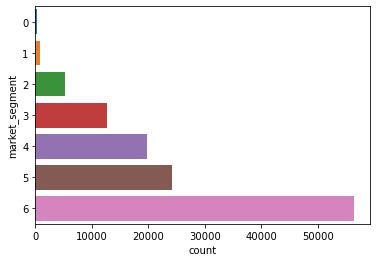

In [107]:
import seaborn as sns

sns.countplot(y="market_segment", data=hotel_bookings_transform)

#### 2. Customer type
- 0 - Contract
- 1 - Group
- 2 - Transient
- 3 - Transient Party

Transient party guests usually are short-term stay with less than 10 nights and are the most dominant customer type. It is a bit surprisng to see the group and contract category being not as outstanding given that the dominant market segment for tour agents. 

<AxesSubplot:xlabel='count', ylabel='customer_type'>

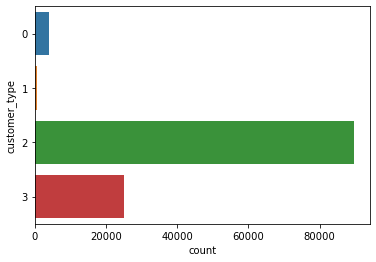

In [108]:
sns.countplot(y="customer_type", data=hotel_bookings_transform)


#### 3. Meals
- 0 - Undefined/SC – no meal package
- 1 - BB – Bed & Breakfast
- 2 - HB – Half board (breakfast and one other meal – usually dinner
- 3 - FB – Full board (breakfast, lunch and dinner)

It is interesting to see that no meal package was the most dominant category. There is a strong need to study the relationship among meals and our target variables (cancellation and ADR). 

<AxesSubplot:xlabel='count', ylabel='meal'>

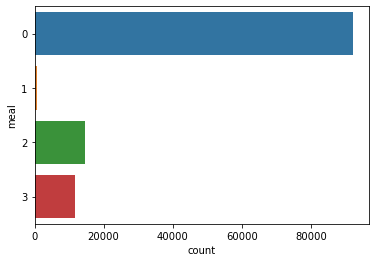

In [149]:
sns.countplot(y="meal", data=hotel_bookings_transform)

#### 4. Arrival date month

It is the peak during the summer time and not as busy during the winter season. It will be interesting to see how this seasonality affects cancellation. 

<AxesSubplot:xlabel='count', ylabel='arrival_date_month'>

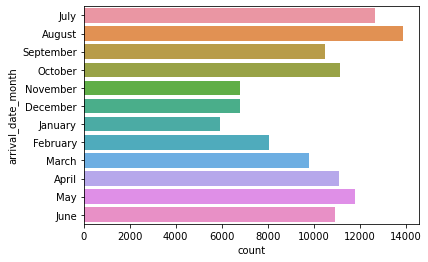

In [154]:
sns.countplot(y="arrival_date_month", data=hotel_bookings_transform)

#### 5. Reserved room type and Assigned room type

- 0 - A
- 1 - B
- 2 - C
- 3 - D
- 4 - E
- 5 - F
- 6 - G
- 7 - H
- 8 - I
- 9 - J

Code is presented for anonymity reason, however this can be a great pair of dataset to see how the discrepancy between the room types affect cancellation and even ADR. Guests tend to not like surprises when it comes to hotel bookings and it might result in cancellations. 

<AxesSubplot:xlabel='count', ylabel='reserved_room_type'>

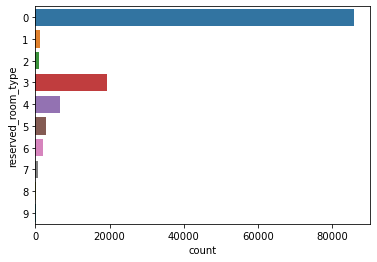

In [157]:
sns.countplot(y="reserved_room_type", data=hotel_bookings_transform)

<AxesSubplot:xlabel='count', ylabel='assigned_room_type'>

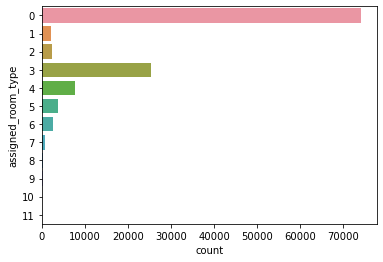

In [158]:
sns.countplot(y="assigned_room_type", data=hotel_bookings_transform)

## Explore Joint Attributes

First we decided to look into correlation for both continuous and categorical variables using heatmap, below you'll find the correlation plot we generated, based on that we have concluded the following:

- Since we transformed the majority of categorical variables into numbers, we were able to compare them with continuous variables. 
- Stays_in_week_nights and Stays_in_weekend_nights are highly correlated : The more days you stay during the week, the more likely you will likely spend the weekend as well
- ADR and children, adults are also correlated. The higher the number of people are staying, the higher the rates go up. 
- Days in waiting_list and lead_time are correlated as customers always have to wait on their booking to be confirmed and take an action on whether to show up or not from then on.
- Reserved and assigned room types are highly correlated yet it is not 100% correlated. It will be interetesting to investigate this discrepancy and how it affects the probability of cancellation. 



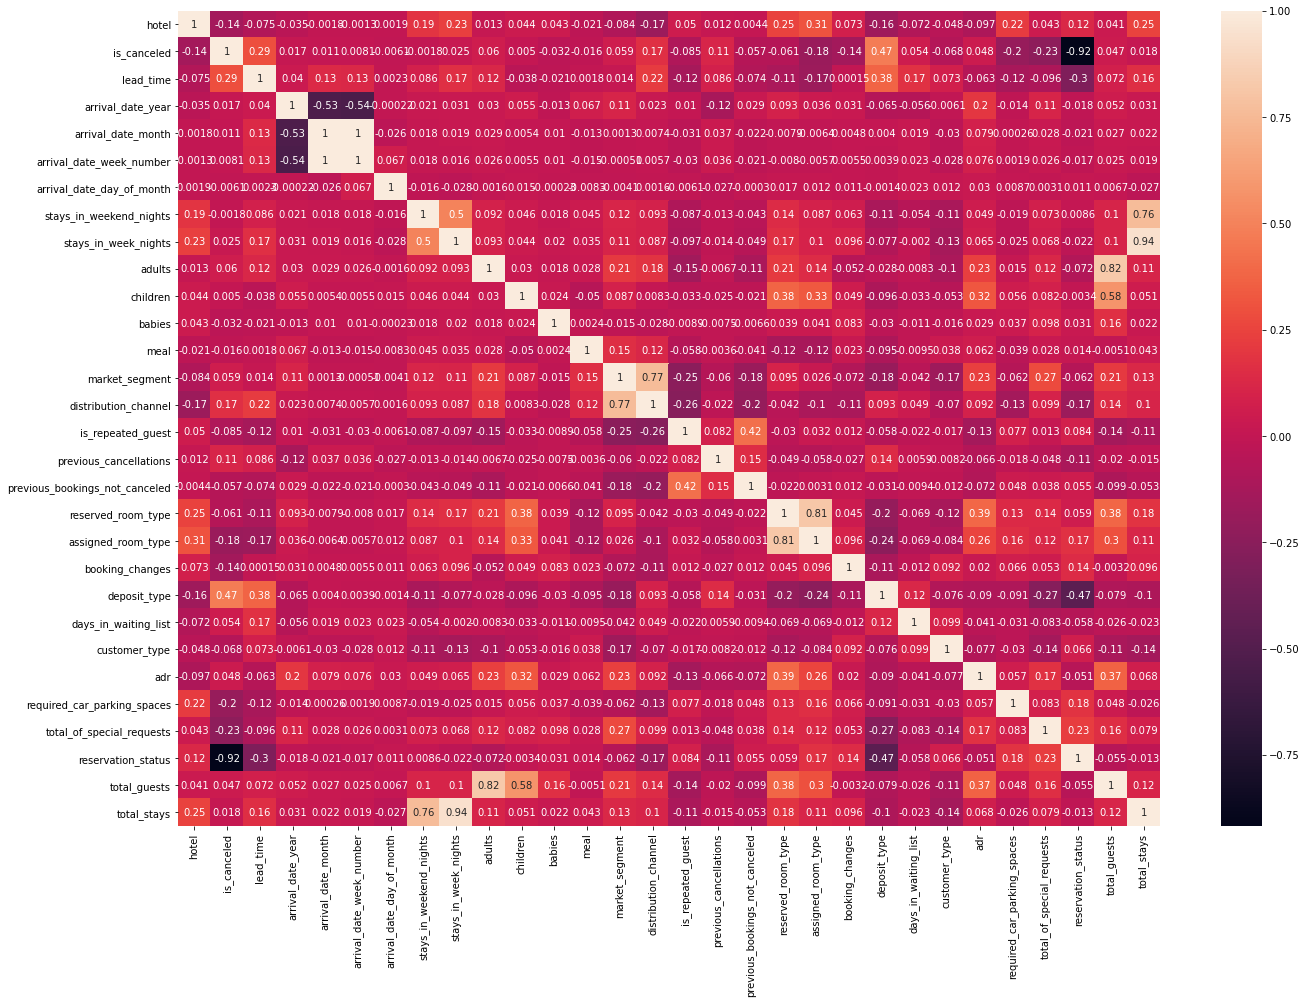

In [108]:
# Heatmap for continuous variables
import seaborn as sns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(hotel_bookings_transform.corr(), annot=True, ax=ax);

## Explore Attributes and Class

### ADR and Cancellation

&emsp; One of the questions we wanted to get answers from this dataset is what are the predictors for a booking cancellation. To start we wanted see if the Average Daily Rate (ADR) for a booking was a factor in cancelling a reservation. We decided to first break the reservations for each room into quartiles based on their ADR then look at the percentile that were cancelled by ADR quartile. Below you'll see the description of the labels we used to indicate each quartile:  


- Very Cheap- First Quartile
- Cheap- Second Quartile
- Expensive- Third Quartile
- Very Expensive- Fourth Quartile


&emsp; We can see that as price increases the number of cancellation increase as well, but there are not much differences on cancellation between 'expensive' and 'very expensive' group. Number of non-cancellation decreases as the prices increases.


In [66]:
from scipy import stats
hotel_bookings_transform.adr.describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Text(0.5, 1.0, 'Percentage of cancellation by ADR Group')

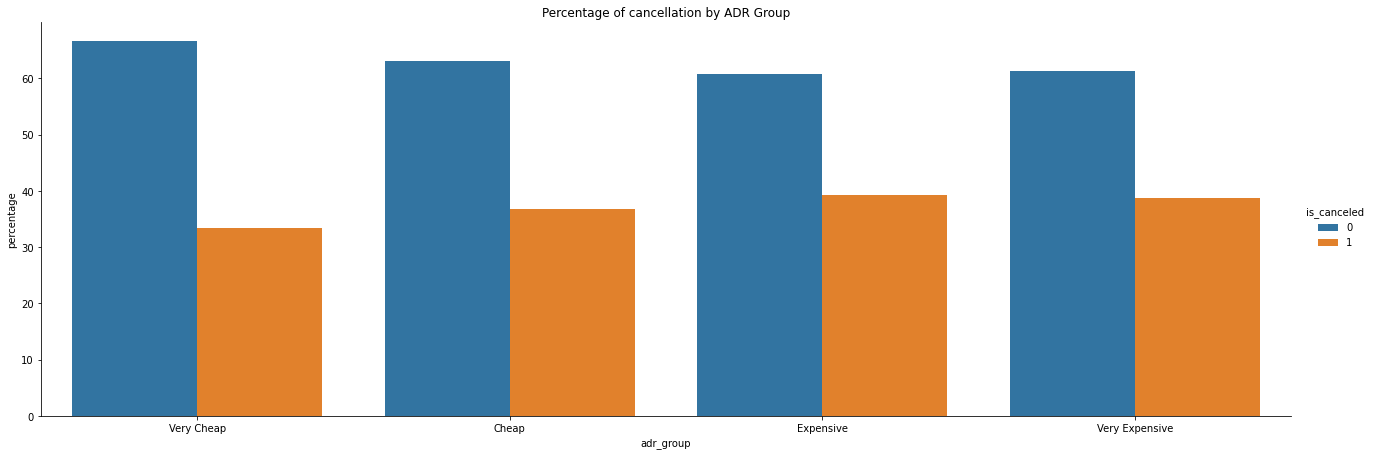

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

hotel_bookings_transform['adr_group'] = pd.cut(hotel_bookings_transform.adr,
                     bins=[-1, 69, 94, 126, 5400],
                     labels=["Very Cheap", "Cheap", "Expensive", "Very Expensive"])


(hotel_bookings_transform
.groupby('adr_group')['is_canceled']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='adr_group',y='percentage',hue='is_canceled',kind='bar', height=6, aspect=3))
plt.title("Percentage of cancellation by ADR Group")

### Room Type Analysis
&emsp; We analyzed the type of room for guests. Depending on the room type, the price of booking may differ, which can result to booking cancellation. It is also possible that guests cancel when they don't get assigned their originally booked room. We converted room type to integer value:
 - A: 0
 - B: 1
 - C: 2
 - D: 3
 - E: 4
 - F: 5
 - G: 6
 - H: 7
 - I: 8
 - J: 9
 - K: 10
 - L: 11

&emsp; We compare room types with ADR and found out that room types 5-7 (F, G, H) have the most expensive rates on average. Also we focused on the counts of the rooms by the adr group. It appears that the rates go up higher starting with room type D. From these charts, it is safe to assume that higher the room types category, the better the room is. 

Text(0.5, 1.0, 'Average ADR by Assigned Room type')

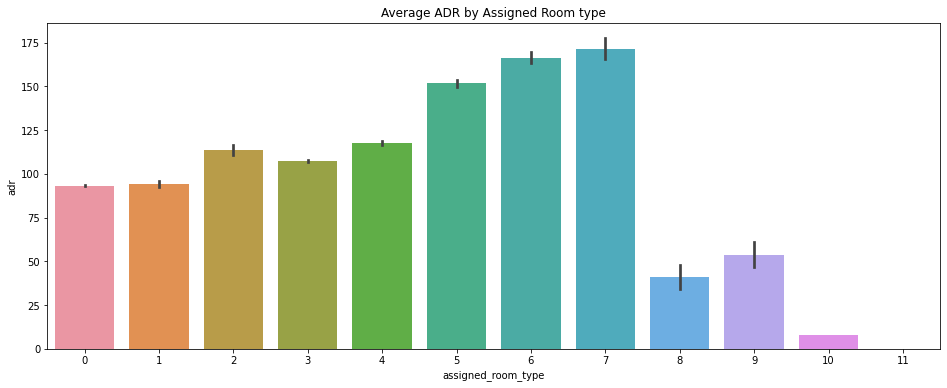

In [68]:
from numpy import mean
plt.figure(figsize=(16,6))
sns.barplot(data=hotel_bookings_transform, x='assigned_room_type', y="adr", estimator=mean)
plt.title("Average ADR by Assigned Room type")

Text(0.5, 1.0, 'Counts of ADR group by Assigned Room type')

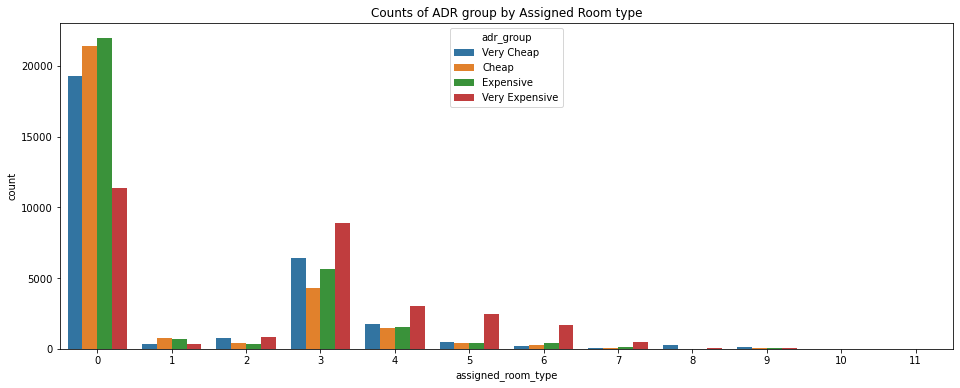

In [69]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="assigned_room_type", hue="adr_group")
plt.title("Counts of ADR group by Assigned Room type")

Text(0.5, 1.0, 'Percentage of ADR group by Assigned Room type')

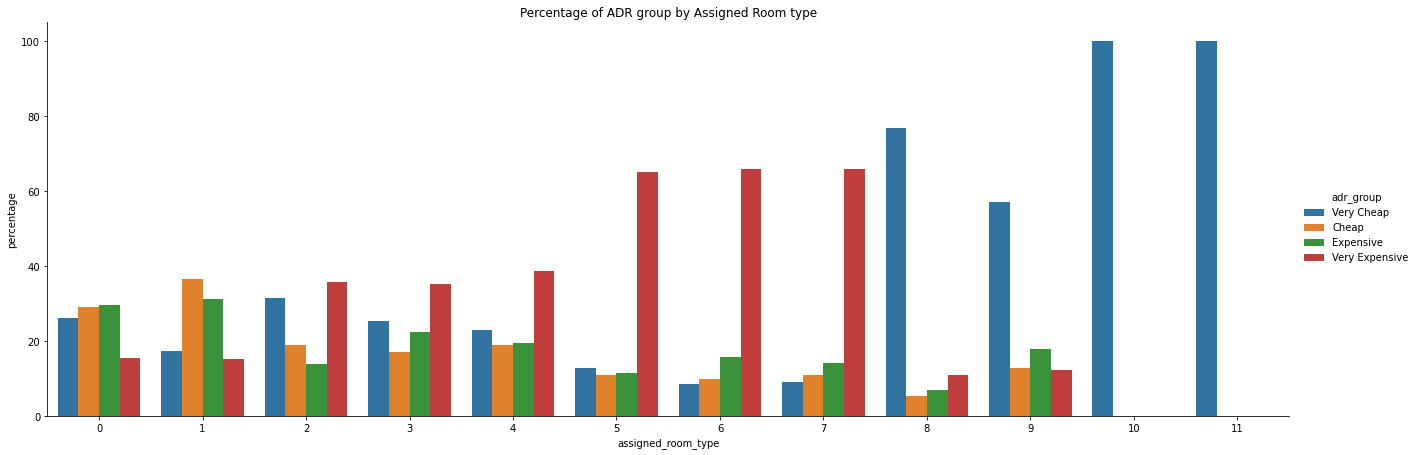

In [70]:
(hotel_bookings_transform
.groupby('assigned_room_type')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='assigned_room_type',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by Assigned Room type")

Text(0.5, 1.0, 'Average ADR by Reserved Room type')

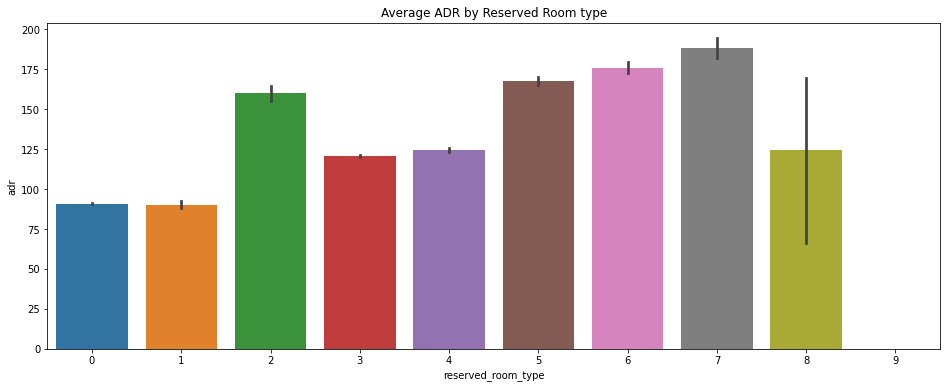

In [71]:
plt.figure(figsize=(16,6))
sns.barplot(data=hotel_bookings_transform, x='reserved_room_type', y="adr", estimator=mean)
plt.title("Average ADR by Reserved Room type")

Text(0.5, 1.0, 'Counts of ADR group by Reserved Room type')

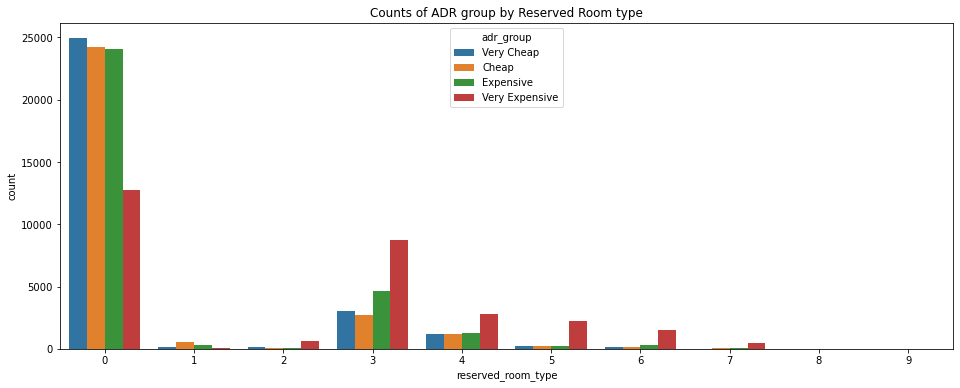

In [72]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="reserved_room_type", hue="adr_group")
plt.title("Counts of ADR group by Reserved Room type")

Text(0.5, 1.0, 'Percentage of ADR group by Reserved Room type')

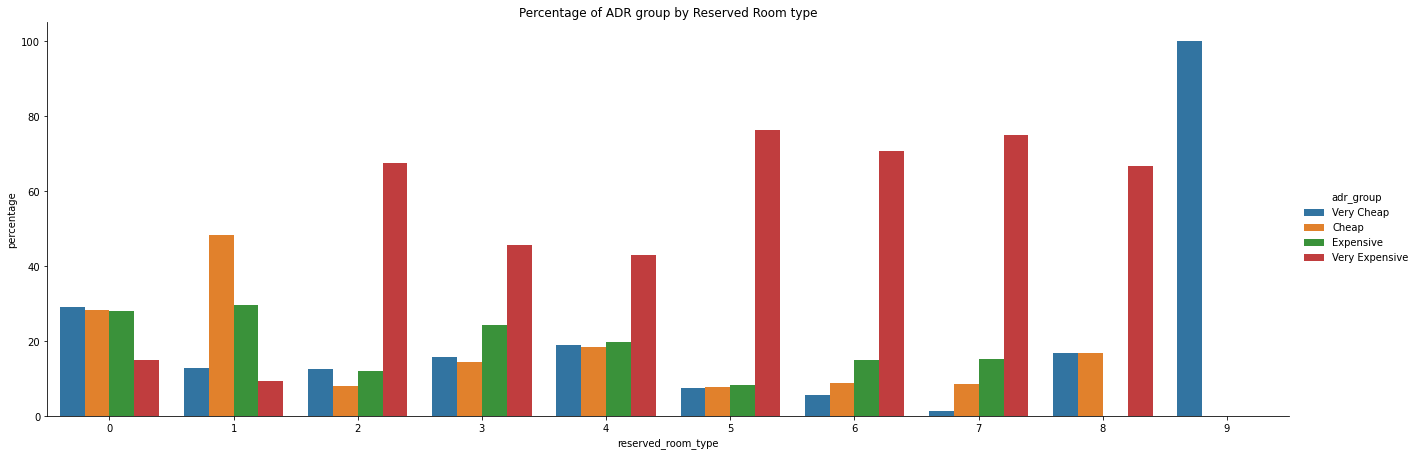

In [73]:
(hotel_bookings_transform
.groupby('reserved_room_type')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='reserved_room_type',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by Reserved Room type")

### Adults/Children/Babies Analysis

&emsp; We also wanted to explore the relationship between number of guests and the price of the hotel booking. We looked into the adults, children, and babies attribute. There are more items to consider on booking when there are children or babies on their stays, which might affect the guests decision on booking or selecting right prices for their stays. 

&emsp; We combined three attributes to create a new feature called total_guests. When there is only one guest, there is a larger number of bookings with lower rates. We can assume that when there are less than 3 guests, the booking will be cheaper, such as room type A. From the chart "Total Guests vs Assigned Room Type", we can confirm our assumption. When there are more than 3 people, their booking prices get more expensive and their assigned room also is better.
When guests book the hotel with their children or babies, the adr tends to be higher. This might be due to the seasonality that they booked during the busy season or booked bigger rooms.

Text(0.5, 1.0, 'Counts of ADR group by number of adult guests')

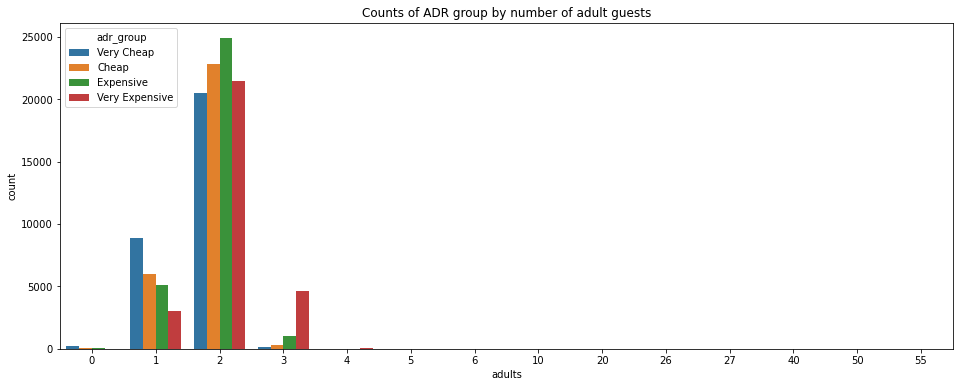

In [74]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="adults", hue="adr_group")
plt.title("Counts of ADR group by number of adult guests")

Text(0.5, 1.0, 'Percentage of ADR group by number of adult guests')

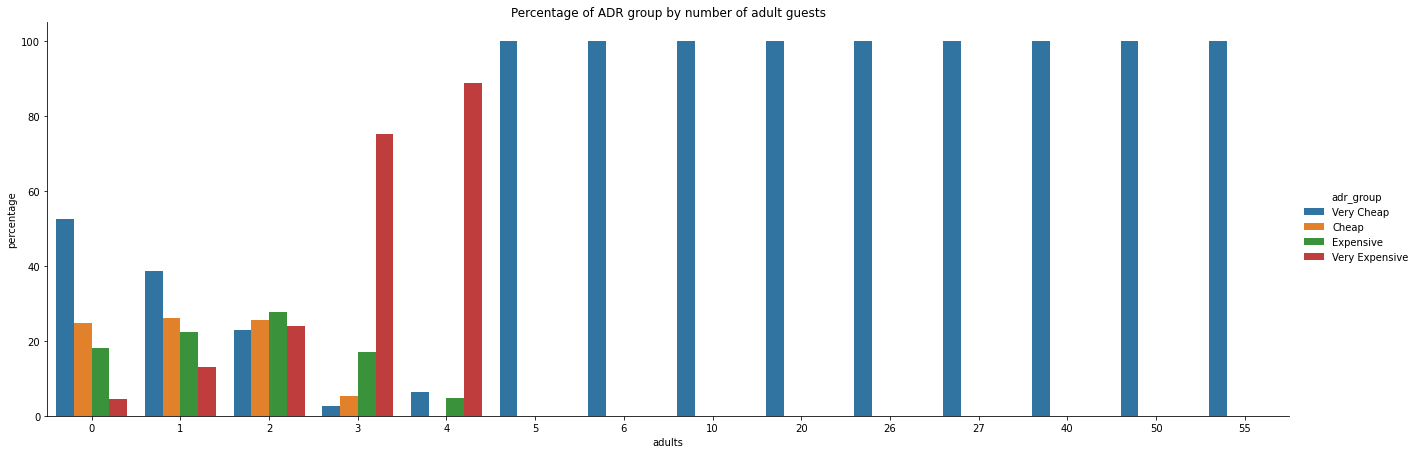

In [75]:
(hotel_bookings_transform
.groupby('adults')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='adults',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by number of adult guests")

Text(0.5, 1.0, 'Counts of Customer Types of adult guests')

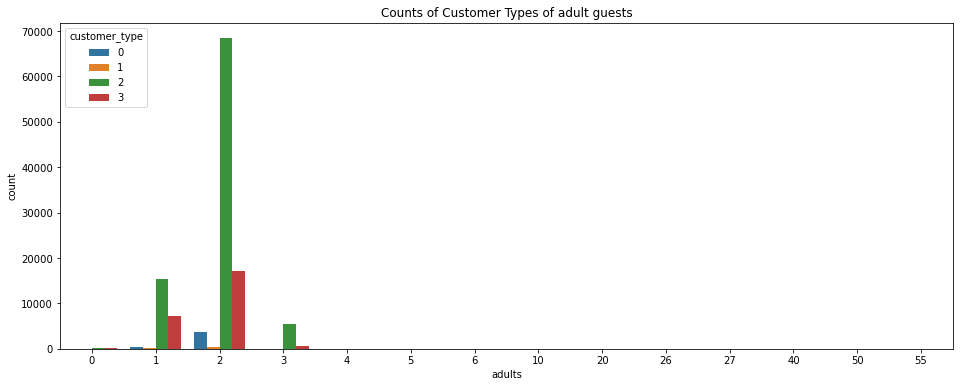

In [76]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="adults", hue="customer_type")
plt.title("Counts of Customer Types of adult guests")

Text(0.5, 1.0, 'Percentage of Customer Types of adult guests')

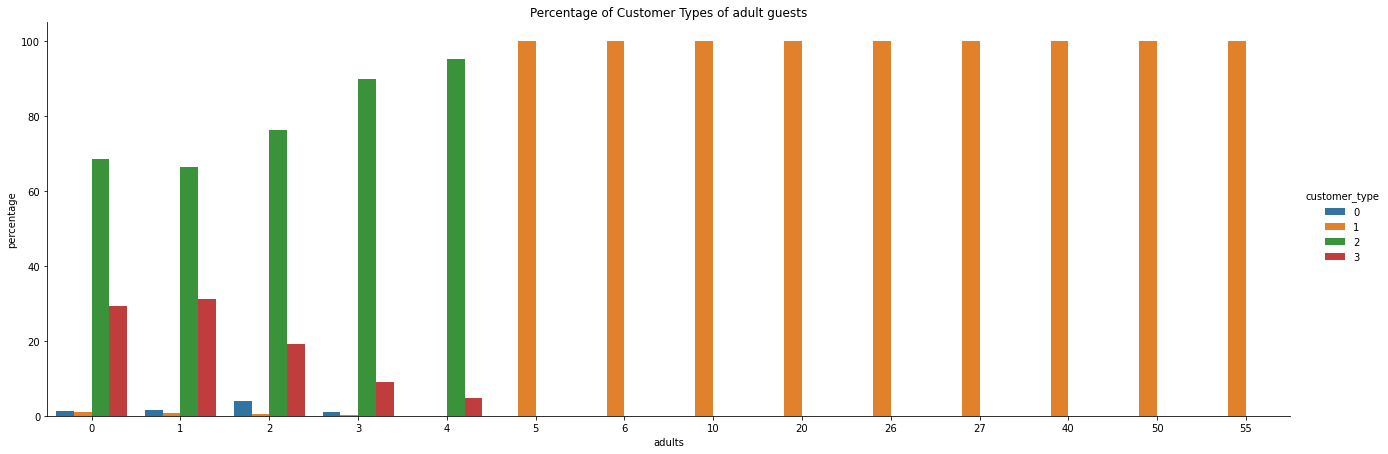

In [77]:
(hotel_bookings_transform
.groupby('adults')['customer_type']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='adults',y='percentage',hue='customer_type',kind='bar', height=6, aspect=3))
plt.title("Percentage of Customer Types of adult guests")

Text(0.5, 1.0, 'Counts of ADR group by number of child guests')

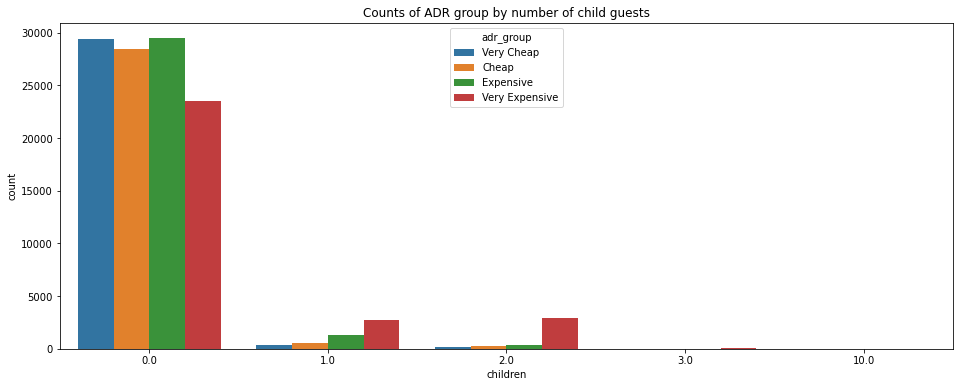

In [78]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="children", hue="adr_group")
plt.title("Counts of ADR group by number of child guests")

Text(0.5, 1.0, 'Percentage of ADR group by number of child guests')

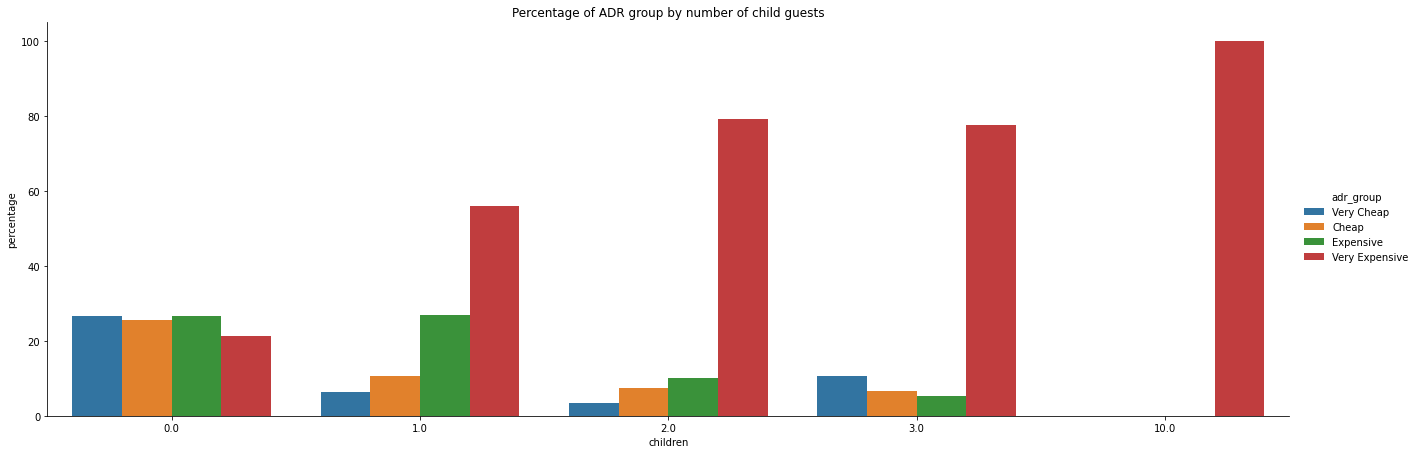

In [79]:
(hotel_bookings_transform
.groupby('children')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='children',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by number of child guests")

Text(0.5, 1.0, 'Children vs Assigned Room Type')

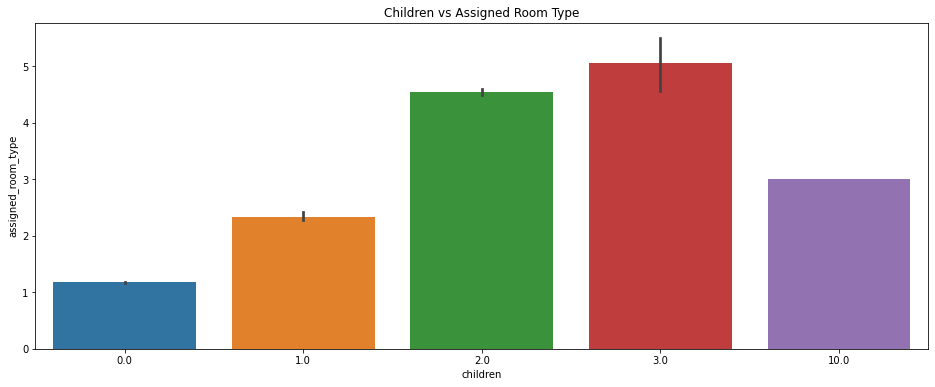

In [80]:
plt.figure(figsize=(16,6))
sns.barplot(data=hotel_bookings_transform, x="children", y="assigned_room_type")
plt.title("Children vs Assigned Room Type")

Text(0.5, 1.0, 'Count of ADR group by number of baby guests')

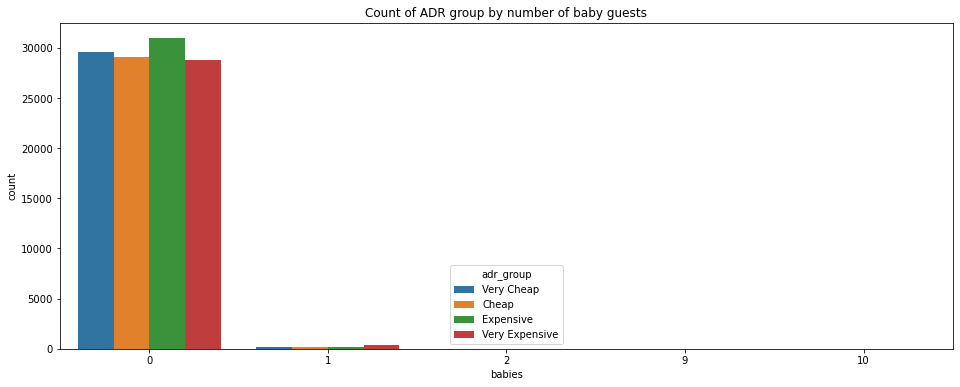

In [81]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="babies", hue="adr_group")
plt.title("Count of ADR group by number of baby guests")

Text(0.5, 1.0, 'Percentage of ADR group by number of baby guests')

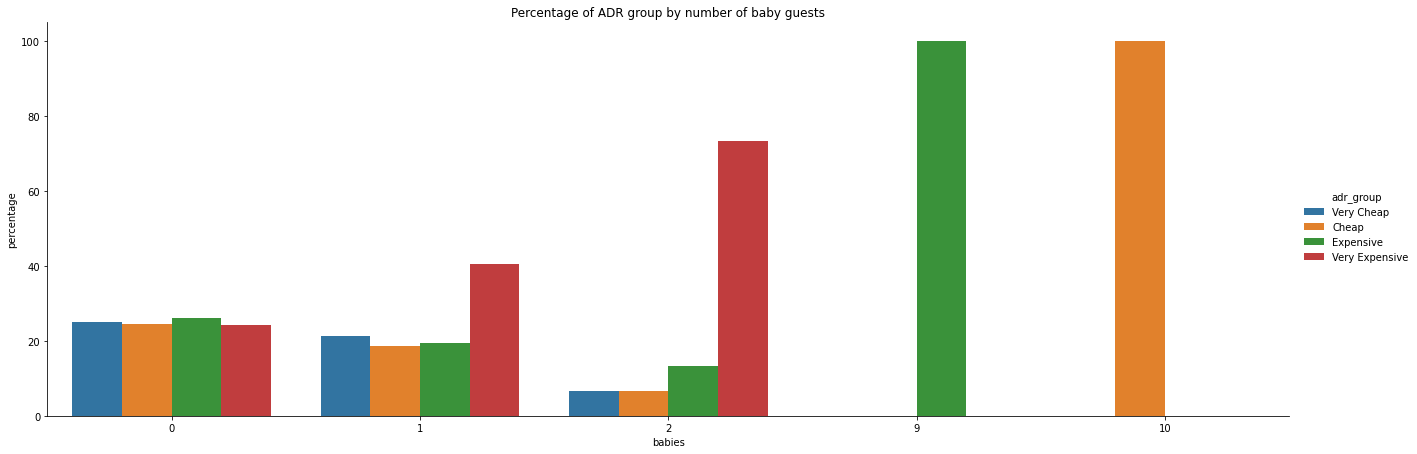

In [82]:
(hotel_bookings_transform
.groupby('babies')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='babies',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by number of baby guests")

Text(0.5, 1.0, 'Counts of ADR group by number of total guests')

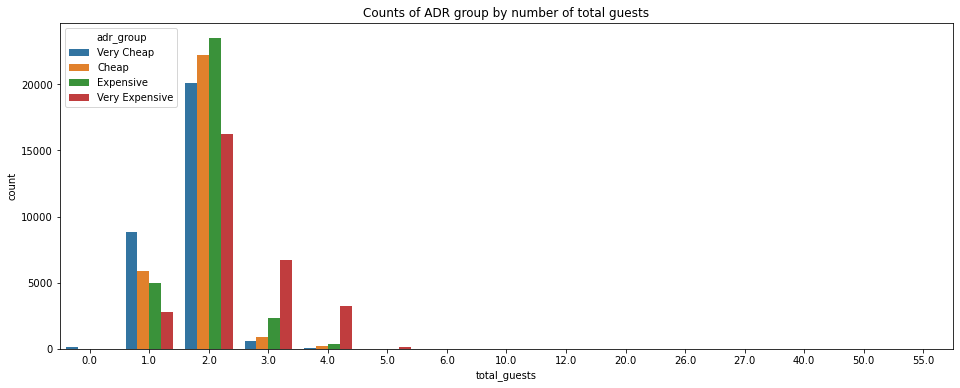

In [83]:
hotel_bookings_transform["total_guests"] = hotel_bookings_transform.adults + hotel_bookings_transform.children + hotel_bookings_transform.babies
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="total_guests", hue="adr_group")
plt.title("Counts of ADR group by number of total guests")

Text(0.5, 1.0, 'Percentage of ADR group by number of total guests')

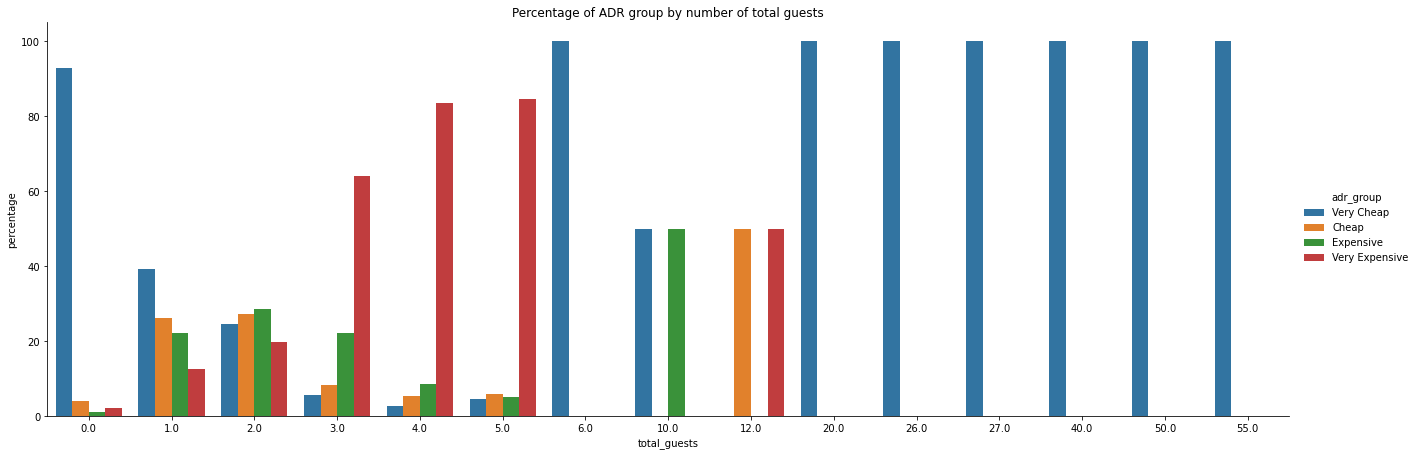

In [84]:
hotel_bookings_transform["total_guests"] = hotel_bookings_transform.adults + hotel_bookings_transform.children + hotel_bookings_transform.babies
(hotel_bookings_transform
.groupby('total_guests')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='total_guests',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by number of total guests")

Text(0.5, 1.0, 'Total Guests vs Assigned Room Type')

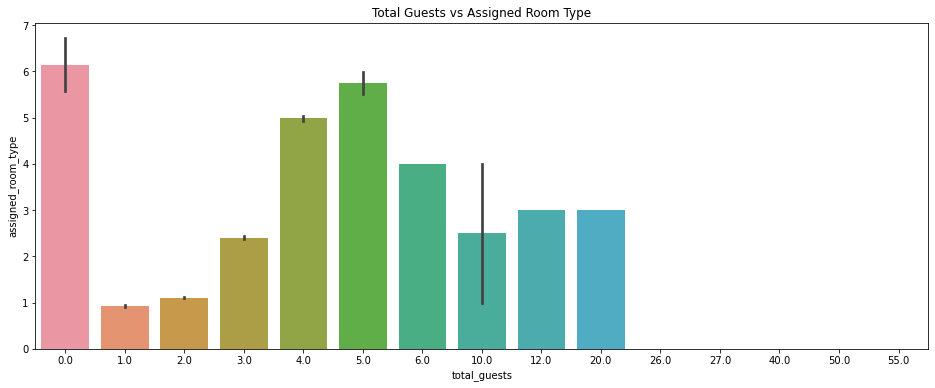

In [85]:
plt.figure(figsize=(16,6))
sns.barplot(data=hotel_bookings_transform, x="total_guests", y="assigned_room_type")
plt.title("Total Guests vs Assigned Room Type")

### Booking Date Analysis

We analyzed the trends of hotel prices and cancellation rate on booking date. We observed the average adr for each year, months to identify the general trends over time. These are bar charts of adr and cancellation for each year. Over the years, the average booking prices increased and number of cancellation increased as well.

Text(0.5, 1.0, 'Average ADR over years')

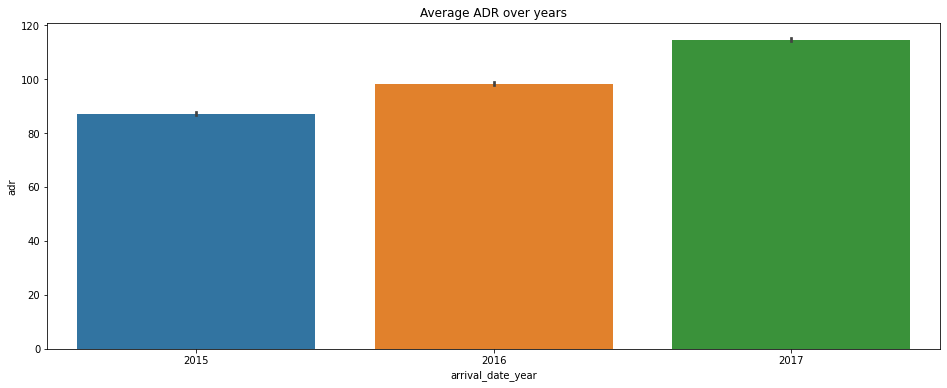

In [86]:
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings_transform, x='arrival_date_year', y="adr", estimator=mean)
plt.title("Average ADR over years")

Text(0.5, 1.0, 'Average ADR over years of Cancellation')

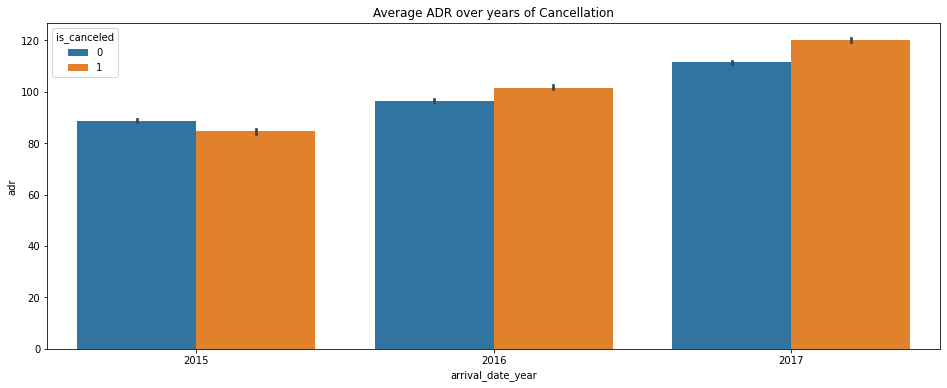

In [87]:
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings_transform, x='arrival_date_year', y="adr", estimator=mean, hue="is_canceled")
plt.title("Average ADR over years of Cancellation")

##### Booking Date - Month

To get more insights for seasonality, we ran the visual analysis that looked at monthly aggregations for each year we had data for. From June to August, the average booking prices was much higher than the other months. We can assume that this is the peak season, and the hotels tended to increase during these that time. From the "Counts of cancellation for each months" chart, there appears to be a higher number of bookings during the peak season. We calculated the total stays by summing up the stays in weekends and weekdays to get the total stays per observation. We examined the average booking price and average duration of stay for each month over the year. 

Text(0.5, 1.0, 'Average ADR for each Months')

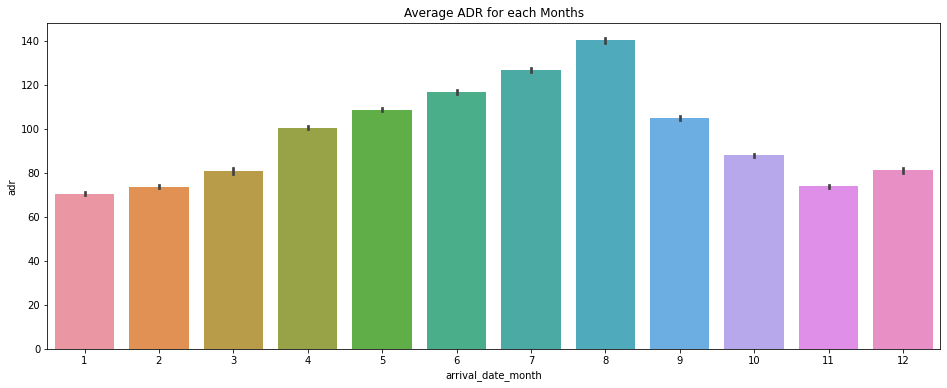

In [88]:
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings_transform, x='arrival_date_month', y="adr", estimator=mean)
plt.title("Average ADR for each Months")

Text(0.5, 1.0, 'Counts of cancellation for each months')

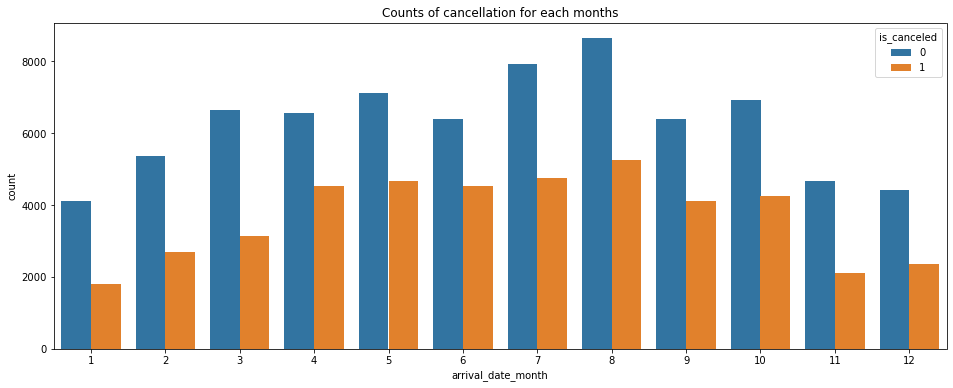

In [89]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="arrival_date_month", hue="is_canceled")
plt.title("Counts of cancellation for each months")

Text(0.5, 1.0, 'Percentage of cancellation for each months')

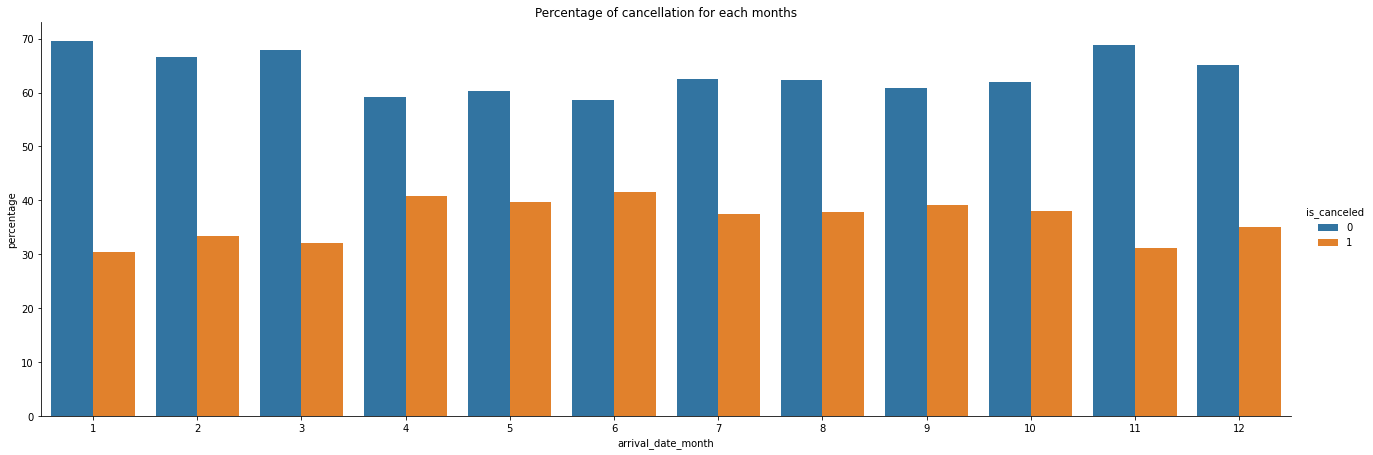

In [90]:
(hotel_bookings_transform
.groupby('arrival_date_month')['is_canceled']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='arrival_date_month',y='percentage',hue='is_canceled',kind='bar', height=6, aspect=3))
plt.title("Percentage of cancellation for each months")

Text(0.5, 0.98, 'Average ADR of every months for each year')

<Figure size 1152x432 with 0 Axes>

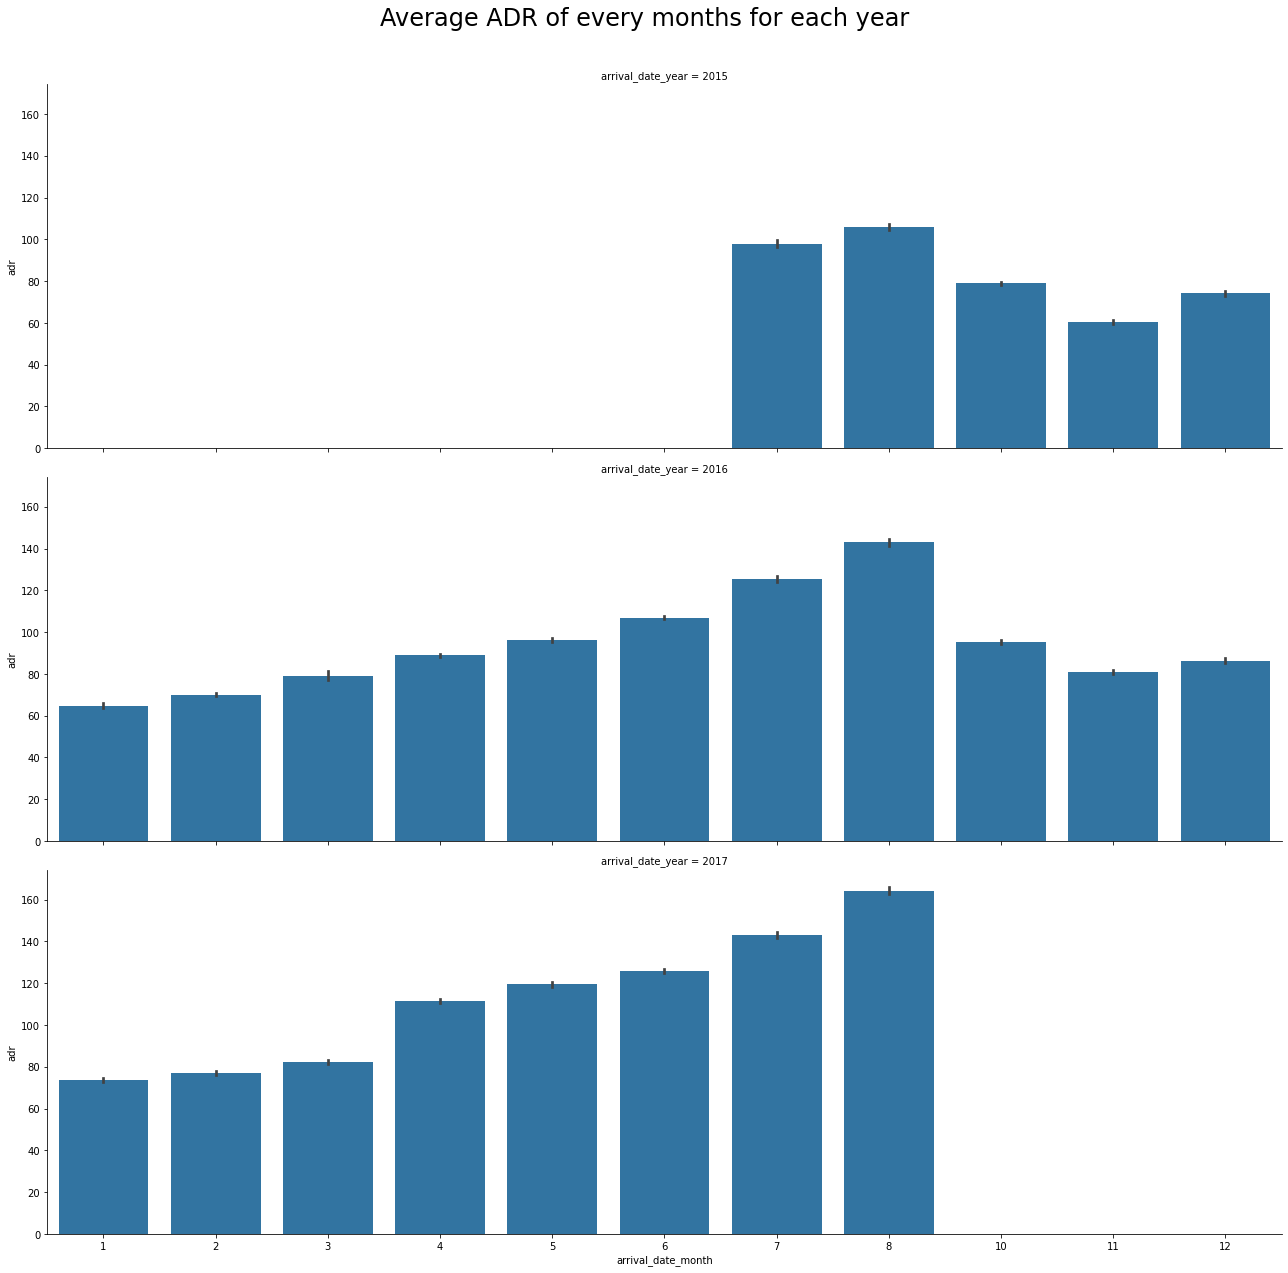

In [91]:
fig = plt.figure(figsize=(16, 6))
g = sns.FacetGrid(hotel_bookings_transform, row="arrival_date_year", height=6, aspect=3)
g.map(sns.barplot, "arrival_date_month", "adr", order=[1,2,3,4,5,6,7,8,10,11,12])
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Average ADR of every months for each year", fontsize=24)

Text(0.5, 0.98, 'Duration of Stays from 2015 to 2017')

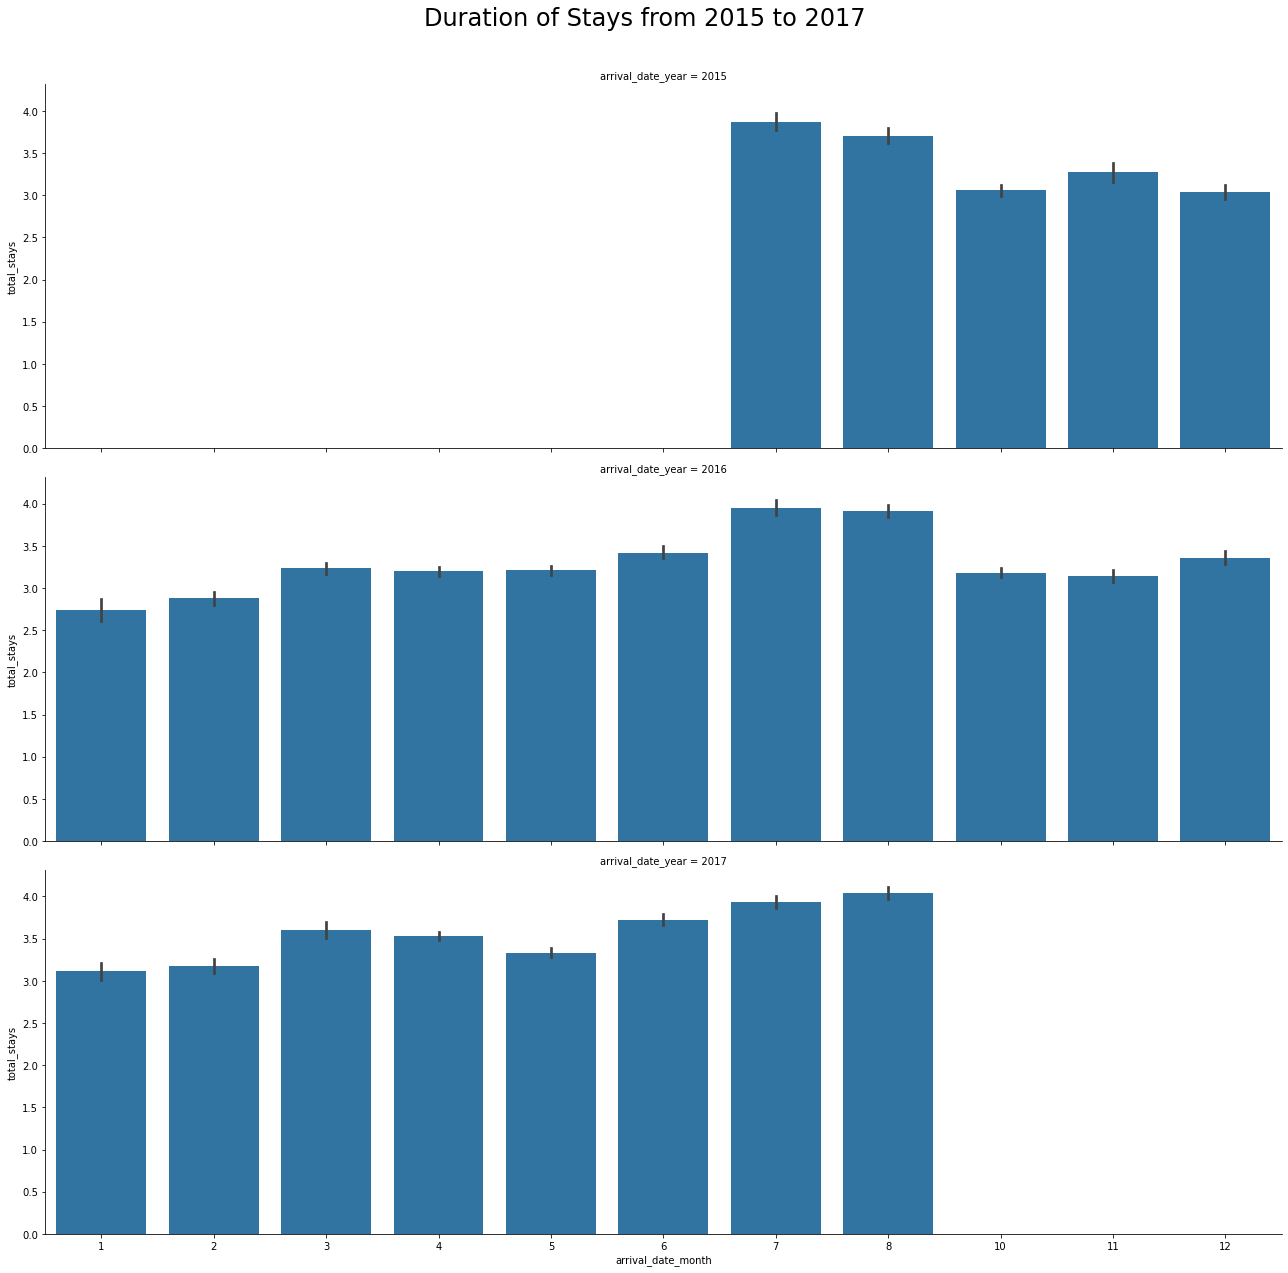

In [92]:
hotel_bookings_transform["total_stays"] = hotel_bookings_transform.stays_in_week_nights + hotel_bookings_transform.stays_in_weekend_nights
g = sns.FacetGrid(hotel_bookings_transform, row="arrival_date_year", height=6, aspect=3)
g.map(sns.barplot, "arrival_date_month", "total_stays", order=[1,2,3,4,5,6,7,8,10,11,12])
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Duration of Stays from 2015 to 2017", fontsize=24)

### Timeseries

We created timeseries graphs on the average ADR, rate of cancellation, number of guests, and duration of stays to investigate the general trends of attributes over the time. Timeseries information gave important insights on changes of attributes for each season.

From the timeseries of average ADR, we identified that during winter season the average price of hotel significantly dropped as well as the number of guests and duration of stays. During peak season (June-August), it showed the opposite result. 

In [94]:
df2 = hotel_bookings_transform[["arrival_date_year", "arrival_date_month"]].copy()
df2.columns = ["year", "month"]
df2
hotel_bookings_transform['booking_date_noDate']=pd.to_datetime(df2['year'].astype(str)  + df2['month'].astype(str), format='%Y%m')

Text(0.5, 1.0, 'Timeseries of Average ADR')

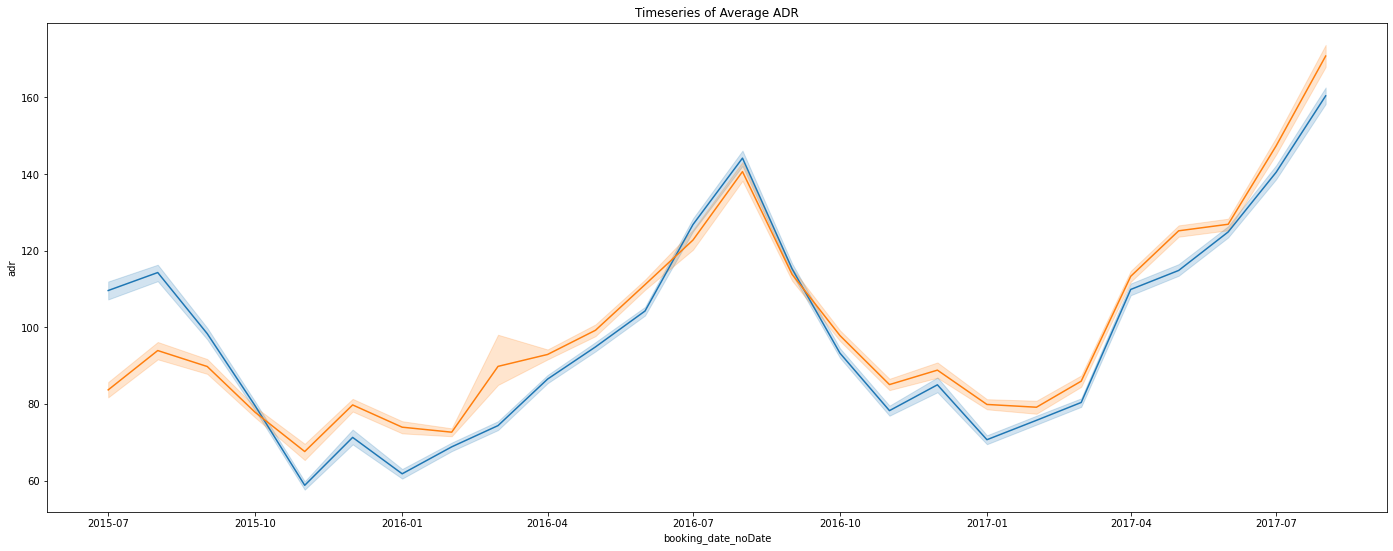

In [95]:
plt.figure(figsize=(24, 9))
sns.lineplot(data=hotel_bookings_transform[hotel_bookings_transform["is_canceled"] == 0], x="booking_date_noDate", y='adr', estimator=mean)
sns.lineplot(data=hotel_bookings_transform[hotel_bookings_transform["is_canceled"] == 1], x="booking_date_noDate", y='adr', estimator=mean)
plt.title("Timeseries of Average ADR")

/Users/boyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Average ADR from 2015 to 2017')

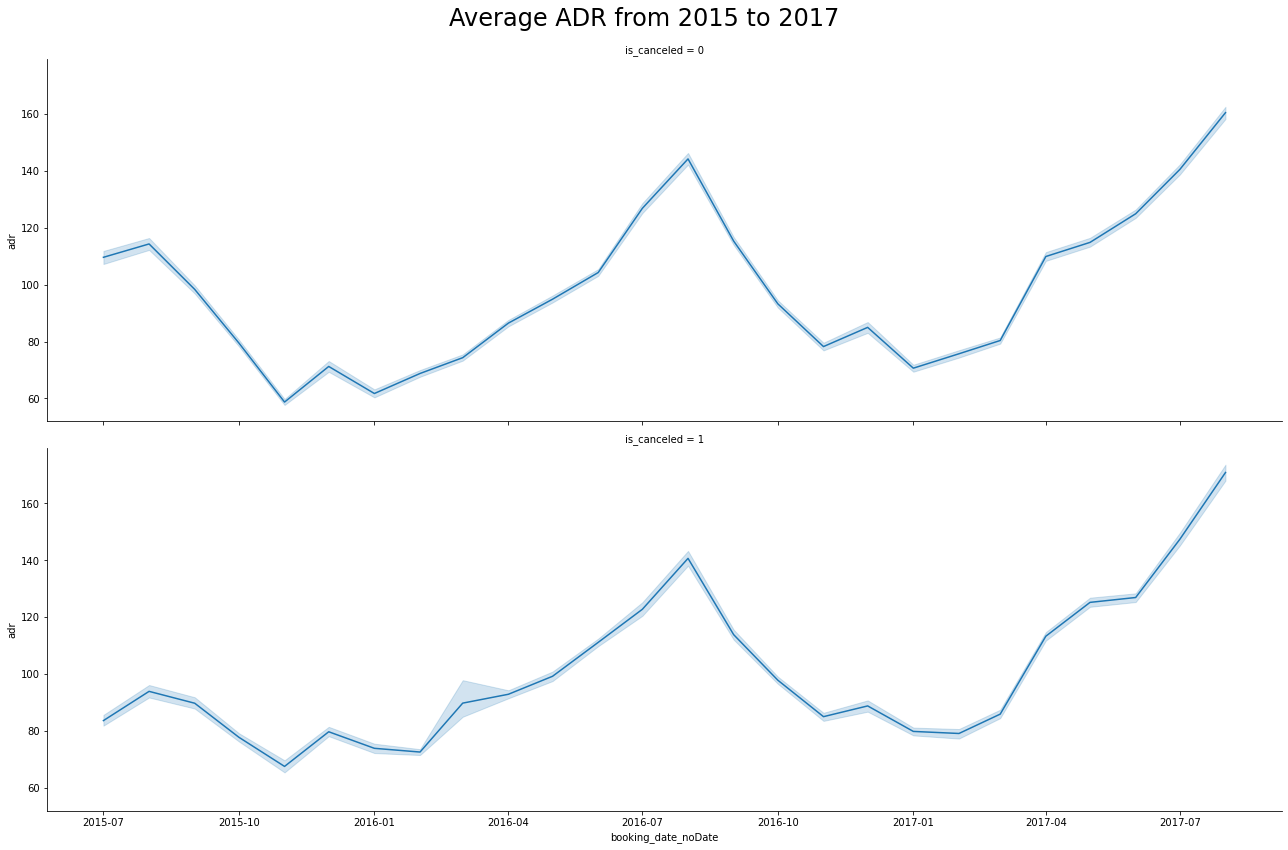

In [96]:
g = sns.FacetGrid(hotel_bookings_transform, row="is_canceled", size=6, aspect=3)
g.map(sns.lineplot, "booking_date_noDate", "adr")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Average ADR from 2015 to 2017", fontsize=24)

Text(0.5, 1.0, 'Number of cancellation over time from 2015 to 2017')

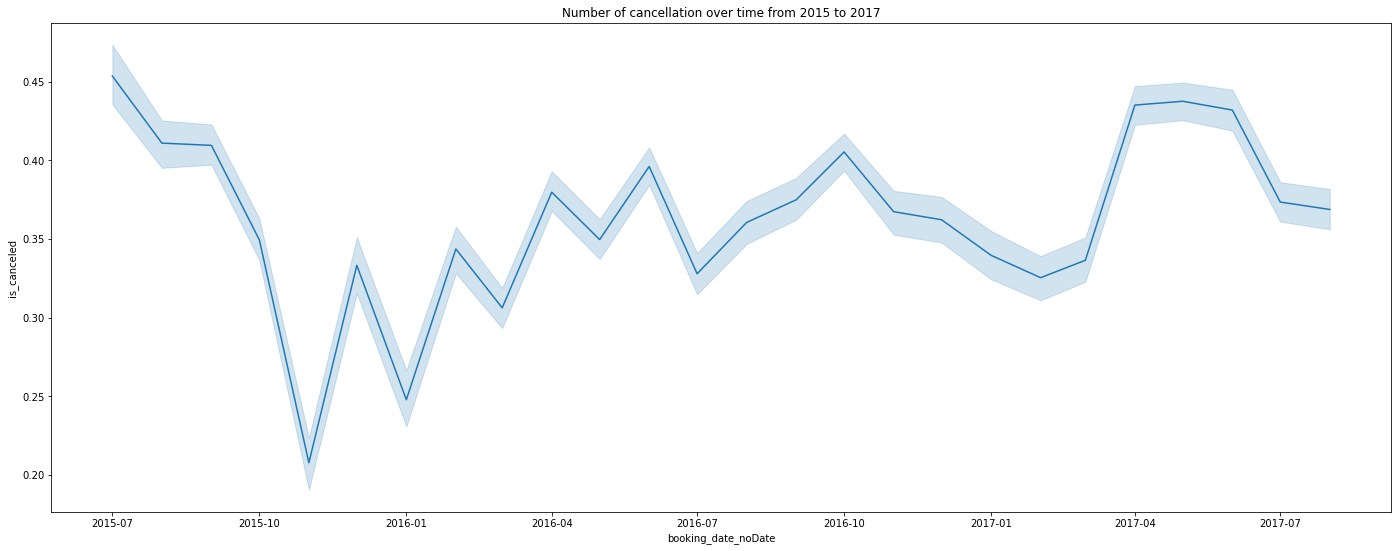

In [97]:
plt.figure(figsize=(24, 9))
sns.lineplot(data=hotel_bookings_transform, x="booking_date_noDate", y="is_canceled", estimator=mean)
plt.title("Number of cancellation over time from 2015 to 2017")

Text(0.5, 1.0, 'Number of guests over time from 2015 to 2017')

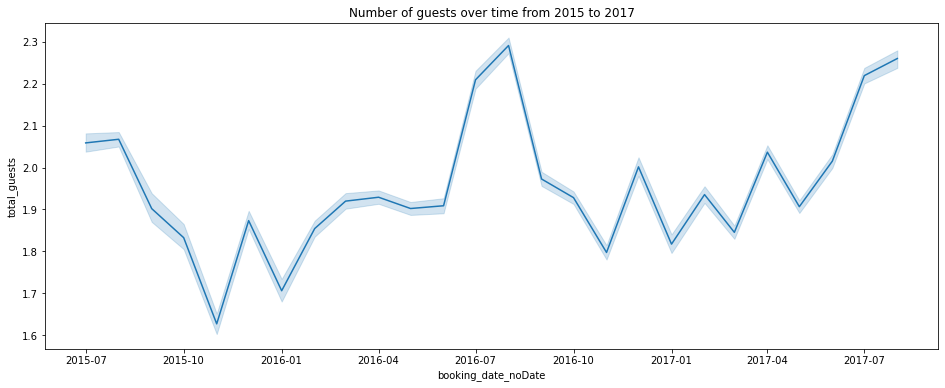

In [98]:
plt.figure(figsize=(16,6))
sns.lineplot(data=hotel_bookings_transform, x="booking_date_noDate", y='total_guests', estimator=mean)
plt.title("Number of guests over time from 2015 to 2017")

Text(0.5, 1.0, 'Average Duration of Stays over year from 2015 to 2017')

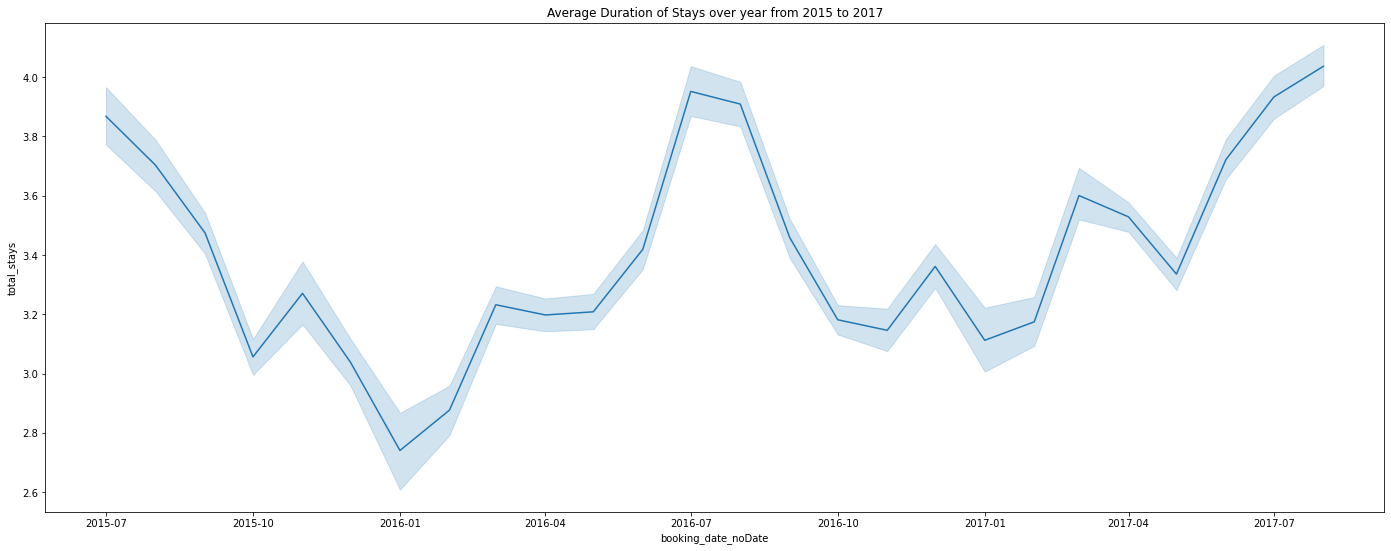

In [99]:
plt.figure(figsize=(24, 9))
sns.lineplot(data=hotel_bookings_transform, x="booking_date_noDate", y='total_stays', estimator=mean)
plt.title("Average Duration of Stays over year from 2015 to 2017")

### Deposit Type Analysis

We also explored the relationship between deposit type and cancellation. When there was a refundable option on booking, the guests have less difficulty in cancelling their booking. It can be an important attribute to predict the cancellation. The label of deposit type is
 - 0 : No Deposit
 - 1 : Non Refund
 - 2 : Refundable

From the count plot of deposit type, most of bookings has no deposit. For the cancellation rate, we expected there will be more cancellation on refundable booking. However, interestingly, there are higher percentages of cancellation on Non Refund than the Refundable booking.

Text(0.5, 1.0, 'Number of cancellation by deposit type')

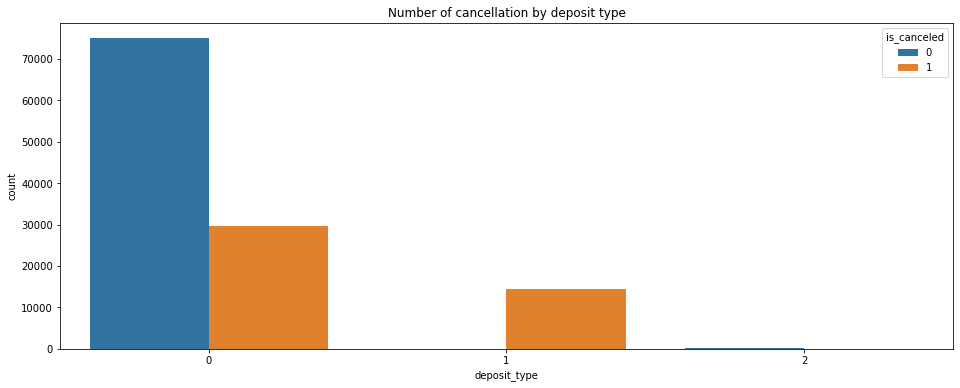

In [100]:
plt.figure(figsize=(16, 6))
sns.countplot(data=hotel_bookings_transform, x='deposit_type', hue="is_canceled")
plt.title("Number of cancellation by deposit type")

Text(0.5, 1.0, 'Percentage of cancellation by deposit type')

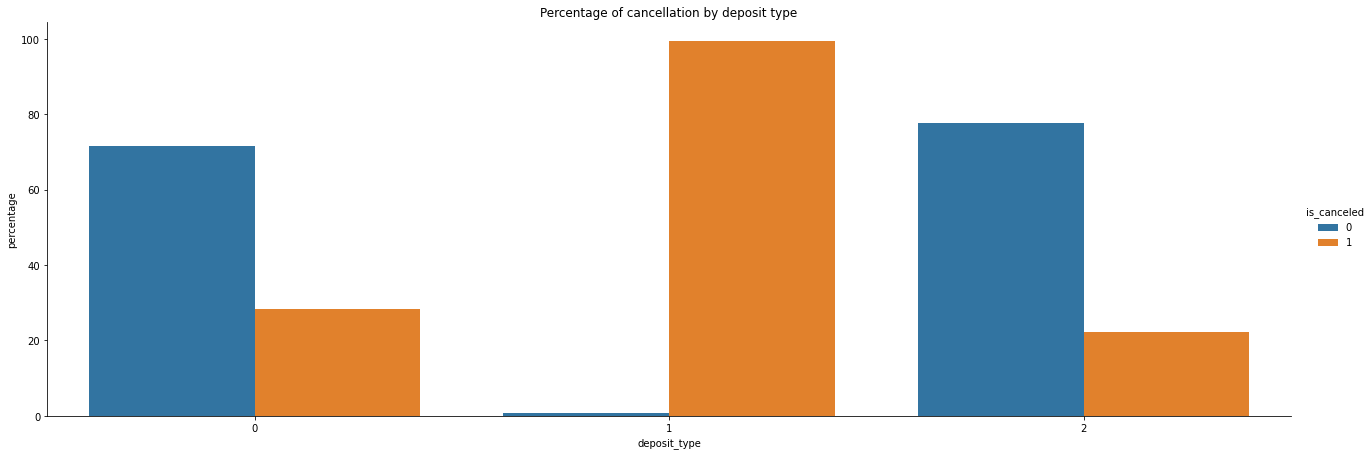

In [101]:
(hotel_bookings_transform
.groupby('deposit_type')['is_canceled']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='deposit_type',y='percentage',hue='is_canceled',kind='bar', height=6, aspect=3))
plt.title("Percentage of cancellation by deposit type")

Text(0.5, 1.0, 'ADR groups by deposit type')

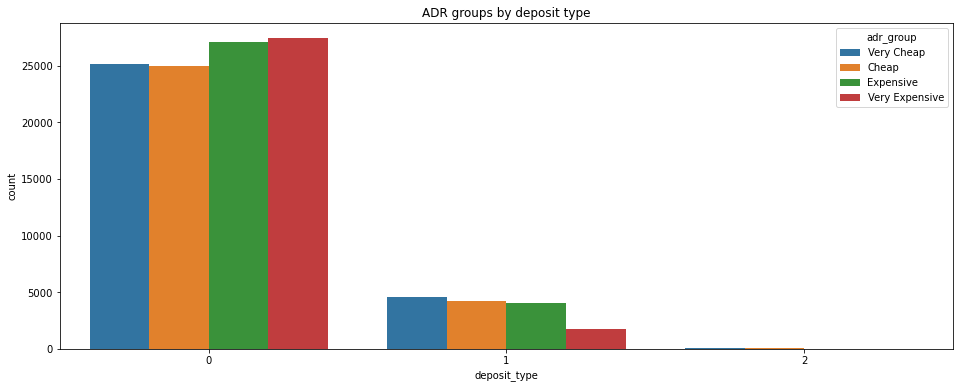

In [102]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="deposit_type", hue="adr_group")
plt.title("ADR groups by deposit type")

Text(0.5, 1.0, 'Percentage of ADR Group by deposit type')

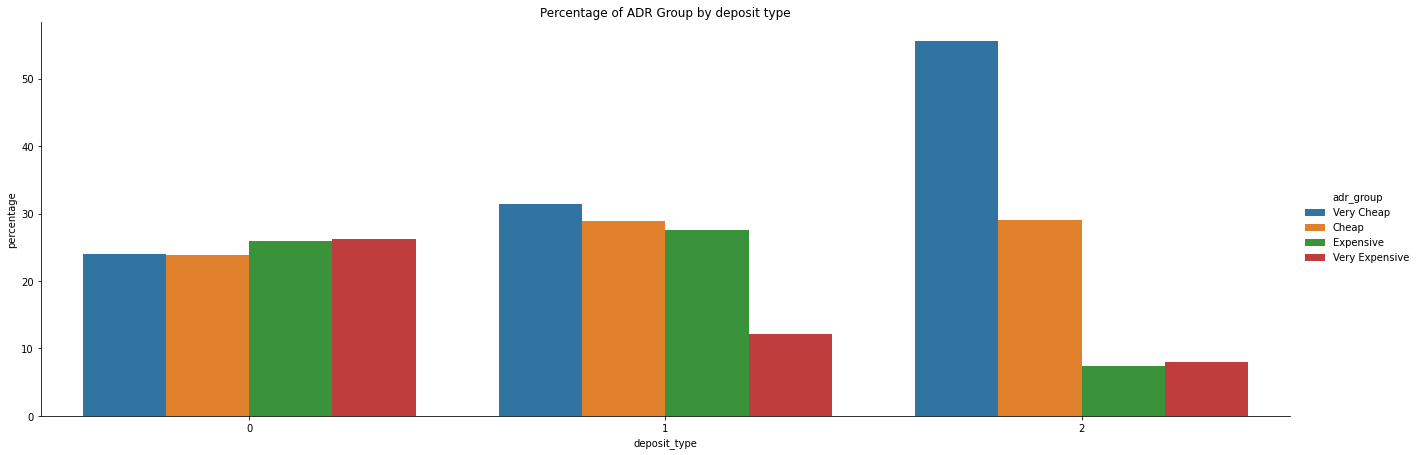

In [103]:
(hotel_bookings_transform
.groupby('deposit_type')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='deposit_type',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR Group by deposit type")

## New Features

**1. Number of rooms**

In our data, the number of guests are from 1 to 50s and we only have room type information on where they are assigned. Our dataset only shows the total number of guests per booking, but it does not break down the total number of rooms, this can have a big impact on our findings. They might booked multiple rooms and they might be all different types. It is also possible that not all the guest in the group stayed at the hotel, thus affecting other metrics. The number of rooms could help get us more insights on cancellation and ADR.

**2. Difference in Reserved Room and Assigned Room**

When the reserved rooms are different from the rooms that are actually assigned, guests might not be satisifed and this could lead to potential cancellation. We can create a new binary feature by assigning 0 if those two attributes match and 1 if not matching. Combining this new feature with our target feature, we can see if that feature affects the cancellation rate of booking.

**3. Age of guests**

Depending on age groups, their cancellation rate and target ADR might be different. Young guests will prefer the lower cost hotel rooms and older guests may be more careful with when scheduling booking thus reducing cancellation rates.  Knowledge of age group would allow us to explore these questions and better understand booking behavior.

**4. Satisfaction/Rates on hotel stays**

Previous experience affects the decision on next visit. When the guests have bad experiences they might be more likely to be less hesitant in cancelling their reservations. Customer satisfaction or rates will affects other guests decisions as well which could affect ADR. Adding this attribute could help with predicting ADR or cancellation. 

## Exceptional work - Logistic regression
&emsp; Additionally, we decided to run a logistic regression on is_cancelled, which is one of our variables of interest to target for classification. We wanted to see which components appeared to be the most significant. The first run we did most the attributes, the second, we removed the least significant and re-ran the regression. We concluded that Lead Time, Total Special Request, Previous Cancellations, Booking Changes, and  Market Segment were the most significant.


&emsp; Lastly, we ran a recursive feature elimination which to select the top 5 features to be the most relevant to predicting is_cancelled. The features chosen were number of adults, is repeated guest, previous cancellations, days in waiting list and total of special requests


In [96]:
hotel_bookings_transform.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [98]:
import statsmodels.api as sm

log_reg = sm.Logit(hotel_bookings_transform['is_canceled'], sm.add_constant(hotel_bookings_transform[
['hotel']
+['lead_time']
+['arrival_date_year']
+['arrival_date_month']
+['arrival_date_week_number']
+['arrival_date_day_of_month']
+['stays_in_weekend_nights']
+['stays_in_week_nights']
+['adults']
+['children']
+['babies']
+['meal']
+['market_segment']
+['distribution_channel']
+['is_repeated_guest']
+['previous_cancellations']
+['previous_bookings_not_canceled']
+['reserved_room_type']
+['assigned_room_type']
+['booking_changes']
+['deposit_type']
+['days_in_waiting_list']
+['customer_type']
+['adr']
+['total_of_special_requests']
+['reservation_status']
])).fit()

log_reg.summary2()
#hotel_bookings.info()





Optimization terminated successfully.
         Current function value: 0.129799
         Iterations 17


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                 Pseudo R-squared:      0.803     
Dependent Variable:        is_canceled           AIC:                   31047.5072
Date:                      2021-01-24 22:38      BIC:                   31309.1413
No. Observations:          119390                Log-Likelihood:        -15497.   
Df Model:                  26                    LL-Null:               -78699.   
Df Residuals:              119363                LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            17.0000                                                
----------------------------------------------------------------------------------
                                Coef.  Std.Err.     z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------------
const                          47.8542  71.1475    0.6726 0.5012 -91.5924 187.3007
hotel                          -0.3983   0.0404   -9.8477 0.0000  -0.4775  -0.3190
lead_time                       0.0006   0.0002    3.1213 0.0018   0.0002   0.0011
arrival_date_year              -0.0221   0.0353   -0.6263 0.5311  -0.0913   0.0471
arrival_date_month             -0.0388   0.1866   -0.2077 0.8354  -0.4045   0.3270
arrival_date_week_number        0.0030   0.0429    0.0709 0.9435  -0.0810   0.0870
arrival_date_day_of_month       0.0035   0.0064    0.5414 0.5882  -0.0091   0.0161
stays_in_weekend_nights         0.0816   0.0199    4.1052 0.0000   0.0426   0.1206
stays_in_week_nights            0.0336   0.0104    3.2175 0.0013   0.0131   0.0540
adults                         -0.0647   0.0188   -3.4460 0.0006  -0.1015  -0.0279
children                        0.1286   0.0446    2.8847 0.0039   0.0412   0.2160
babies                          0.0473   0.1769    0.2675 0.7891  -0.2994   0.3940
meal                           -0.0196   0.0164   -1.1965 0.2315  -0.0518   0.0125
market_segment                  0.1260   0.0258    4.8774 0.0000   0.0754   0.1766
distribution_channel           -0.0755   0.0349   -2.1643 0.0304  -0.1438  -0.0071
is_repeated_guest              -0.1457   0.1308   -1.1145 0.2651  -0.4021   0.1106
previous_cancellations          0.2702   0.0398    6.7832 0.0000   0.1921   0.3483
previous_bookings_not_canceled -0.0608   0.0180   -3.3883 0.0007  -0.0960  -0.0256
reserved_room_type              0.1343   0.0217    6.1821 0.0000   0.0917   0.1769
assigned_room_type             -0.1493   0.0199   -7.5191 0.0000  -0.1882  -0.1104
booking_changes                -0.1883   0.0278   -6.7837 0.0000  -0.2427  -0.1339
deposit_type                    1.7196   0.0730   23.5623 0.0000   1.5766   1.8627
days_in_waiting_list           -0.0030   0.0010   -2.8584 0.0043  -0.0050  -0.0009
customer_type                  -0.1219   0.0308   -3.9562 0.0001  -0.1823  -0.0615
adr                             0.0009   0.0004    1.9630 0.0496   0.0000   0.0018
total_of_special_requests      -0.3140   0.0237  -13.2524 0.0000  -0.3604  -0.2676
reservation_status             -6.4712   0.0374 -173.0143 0.0000  -6.5445  -6.3979
==================================================================================

"""

In [99]:
log_reg = sm.Logit(hotel_bookings_transform['is_canceled'], sm.add_constant(hotel_bookings_transform[
['hotel']
+['lead_time']
+['adults']
+['children']
+['market_segment']
+['distribution_channel']
+['previous_cancellations']
+['previous_bookings_not_canceled']
+['reserved_room_type']
+['assigned_room_type']
+['booking_changes']
+['deposit_type']
+['days_in_waiting_list']
+['customer_type']
+['total_of_special_requests']
+['reservation_status']
])).fit()

log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.130109
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                   Logit                 Pseudo R-squared:      0.803     
Dependent Variable:      is_canceled           AIC:                   31101.3961
Date:                    2021-01-24 22:38      BIC:                   31266.1287
No. Observations:        119390                Log-Likelihood:        -15534.   
Df Model:                16                    LL-Null:               -78699.   
Df Residuals:            119373                LLR p-value:           0.0000    
Converged:               1.0000                Scale:                 1.0000    
No. Iterations:          8.0000                                                 
--------------------------------------------------------------------------------
                                Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
const                           3.3155   0.1231   26.9286 0.0000  3.0742  3.5568
hotel                          -0.3431   0.0382   -8.9902 0.0000 -0.4179 -0.2683
lead_time                       0.0008   0.0002    4.3502 0.0000  0.0005  0.0012
adults                         -0.0615   0.0190   -3.2299 0.0012 -0.0988 -0.0242
children                        0.1403   0.0432    3.2490 0.0012  0.0557  0.2249
market_segment                  0.1325   0.0251    5.2887 0.0000  0.0834  0.1816
distribution_channel           -0.0652   0.0342   -1.9077 0.0564 -0.1321  0.0018
previous_cancellations          0.2600   0.0388    6.7092 0.0000  0.1841  0.3360
previous_bookings_not_canceled -0.0697   0.0172   -4.0579 0.0000 -0.1033 -0.0360
reserved_room_type              0.1621   0.0208    7.7913 0.0000  0.1213  0.2029
assigned_room_type             -0.1600   0.0196   -8.1442 0.0000 -0.1985 -0.1215
booking_changes                -0.1776   0.0278   -6.3818 0.0000 -0.2321 -0.1231
deposit_type                    1.7228   0.0724   23.7794 0.0000  1.5808  1.8648
days_in_waiting_list           -0.0032   0.0010   -3.1206 0.0018 -0.0053 -0.0012
customer_type                  -0.1484   0.0303   -4.8901 0.0000 -0.2079 -0.0889
total_of_special_requests      -0.3128   0.0235  -13.3242 0.0000 -0.3588 -0.2668
reservation_status             -6.4600   0.0370 -174.5242 0.0000 -6.5325 -6.3874
================================================================================

"""

In [100]:
#code modified from https://machinelearningmastery.com/feature-selection-machine-learning-python/

from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

array = hotel_bookings_transform[['hotel'
,'lead_time'
,'arrival_date_year'
,'arrival_date_month'
,'arrival_date_week_number'
,'arrival_date_day_of_month'
,'stays_in_weekend_nights'
,'stays_in_week_nights'
,'adults'
,'children'
,'babies'
,'meal'
,'market_segment'
,'distribution_channel'
,'is_repeated_guest'
,'previous_cancellations'
,'previous_bookings_not_canceled'
,'reserved_room_type'
,'assigned_room_type'
,'booking_changes'
,'days_in_waiting_list'
,'customer_type'
,'adr'
,'total_of_special_requests'
,'reservation_status']].values


X = array[:,0:24]
Y = array[:,24]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False False False False False False False False  True False False False
 False False  True  True False False False False  True False False  True]
Feature Ranking: [ 4 18 20 11 13 19 10 14  1  9 16 15 12  6  1  1  5  3  2  7  1  8 17  1]


## Exceptional work - Dimensionality reduction using Factor analysis of mixed data (FAMD)
### This technique is useful for a datset that contains both categorical and numerical features. 

&emsp;   1. Standardization of the both categorical and numeric variables is very important for FAMD. This is automatically done by the package “prince”. 

&emsp;    2. We deleted the following three features “country”,”agent” and ”company” due to errors while fitting FADM and ran the analysis on the rest of the features except the target feature “is_canceled”. 

&emsp;    3. Here inertia means the same as the “explained variance”. Unfortunately, the resulting numbers of the first two components were very low.  This most likely has to do with scaling categorical variables and fitting them with numerical variables. We will keep investigating the cause of this error and resolve the issue.

In [5]:
import pandas as pd
import prince
import pprint
from prince import FAMD

In [112]:
del hotel_bookings['company']
del hotel_bookings['agent']

In [113]:
# Encoding some features
hotel_bookings["is_canceled"]=hotel_bookings["is_canceled"].astype(str)
hotel_bookings["is_repeated_guest"]=hotel_bookings["is_repeated_guest"].astype(str)
hotel_bookings["distribution_channel"]=hotel_bookings["distribution_channel"].astype(str)
hotel_bookings["previous_cancellations"]=hotel_bookings["previous_cancellations"].astype(str)
hotel_bookings["reserved_room_type"]=hotel_bookings["reserved_room_type"].astype(str)
hotel_bookings["deposit_type"]=hotel_bookings["deposit_type"].astype(str)
hotel_bookings["market_segment"]=hotel_bookings["market_segment"].astype(str)
hotel_bookings["meal"]=hotel_bookings["meal"].astype(str)
hotel_bookings["assigned_room_type"]=hotel_bookings["assigned_room_type"].astype(str)
hotel_bookings["customer_type"]=hotel_bookings["customer_type"].astype(str)
hotel_bookings["reservation_status"]=hotel_bookings["reservation_status"].astype(str)

In [115]:
# Turning all the categorical features into object features for FAMD processing

hotel_bookings.loc[:, hotel_bookings.dtypes == 'category'] =\
    hotel_bookings.select_dtypes(['category'])\
    .apply(lambda x: x.astype('object'))

hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int8   
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [116]:
# Instantiate FAMD object
famd = FAMD(n_components =30, n_iter = 5, random_state = 101)

In [117]:
# Fit FAMD to the data
famd = famd.fit(hotel_bookings.drop('is_canceled', axis=1)) # Exclude target variable "is_canceled"

In [118]:
famd.transform(hotel_bookings)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.646799,0.771167,-1.072219,-1.162184,-1.568864,-0.998993,0.194397,-0.463291,2.433882,0.622903,...,0.035250,-0.074610,-1.311175,-0.041310,-1.275222,0.713053,1.354409,2.018996,0.535159,-0.039496
1,-0.995192,1.404793,0.042190,-1.566245,-2.396979,-0.445450,0.856533,-0.494850,3.277293,1.037435,...,0.024710,-0.096852,-1.424406,0.087273,-1.297929,0.855574,1.346090,1.978606,0.505969,-0.110487
2,-0.818810,0.000207,-1.507745,-0.371649,-0.418166,-1.160160,-1.083559,-0.190939,0.574518,0.145115,...,0.313025,0.093763,-0.668808,-0.112993,-0.511883,0.022512,0.443569,0.782881,0.462926,-0.456272
3,-1.332413,-0.327418,-1.587247,-0.489974,-0.270755,-0.513024,-1.239301,-0.294872,0.379059,0.091230,...,0.176359,0.461600,-0.534637,-0.698034,0.116037,-0.233368,-0.302291,0.567930,0.162683,0.555213
4,-0.189442,0.389761,-0.837615,0.028886,0.675254,-0.591586,-1.202798,0.191003,0.782867,-0.256412,...,-0.327100,-0.148156,0.015320,0.234653,-0.111330,-0.164080,-0.248511,0.589668,0.302819,-0.460225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.546933,0.357960,0.602109,-0.440152,0.401805,0.564556,0.784864,-0.215135,-1.540541,0.051184,...,0.333450,0.260160,-0.189171,-0.587843,-0.486808,0.389558,0.460227,-0.432307,-0.397790,0.269231
119386,2.443787,1.236313,1.041589,0.569311,0.829067,1.192435,1.148637,0.885613,-1.059387,-0.038695,...,-0.067841,0.378528,0.669029,-0.609814,0.835271,0.117238,-0.195989,-1.205344,-0.298183,0.402367
119387,2.395853,0.796746,0.346744,0.375209,1.656737,1.756375,1.517733,0.185375,-0.882901,-0.244029,...,0.224157,0.292383,-0.564407,-0.642646,0.339753,-0.017287,0.479168,-0.972651,-0.438740,-0.345824
119388,0.649358,0.548479,0.914002,-0.494054,0.258207,0.749108,0.939479,-0.139560,-1.464002,0.184695,...,0.180120,0.430291,-0.052987,-0.610983,0.607405,-0.033114,0.333100,-0.957406,-0.064018,-0.100219


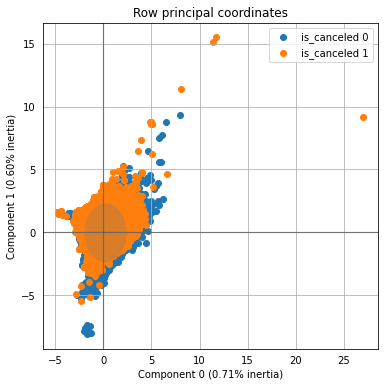

In [119]:
# FAMD plot
ax = famd.plot_row_coordinates(hotel_bookings,color_labels=['is_canceled {}'.format(t) for t in hotel_bookings['is_canceled']] )

In [120]:
# Principal dimensions results
pp = pprint.PrettyPrinter()
pp.pprint(famd.explained_inertia_) 

array([0.00714864, 0.00604635, 0.00539866, 0.00482915, 0.00377779,
       0.00353335, 0.00335302, 0.00326451, 0.00320371, 0.00291787,
       0.0027944 , 0.00257153, 0.00242219, 0.00228354, 0.00201546,
       0.00189184, 0.00180086, 0.00172152, 0.00163884, 0.00160684,
       0.00150709, 0.00150133, 0.00149251, 0.00144014, 0.00143063,
       0.00140164, 0.00139235, 0.00137063, 0.00132129, 0.00131442])
